# Base

# 1. 牛頓法與平方根

牛顿法是一种在实数域和复数域上近似求解方程的方法。方法使用函数 $f(x)$ 的泰勒级数的前面几项来寻找方程 $f(x) = 0 $的根。

$$ 0 = (x - x_0).f'(x_0)+f(x_0)$$

推導流程 : $ 0 = (x - x_0).f'(x_0)+f(x_0)$ -> $ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$ -> `root = (1/2) * (root + (input_num/ root))`

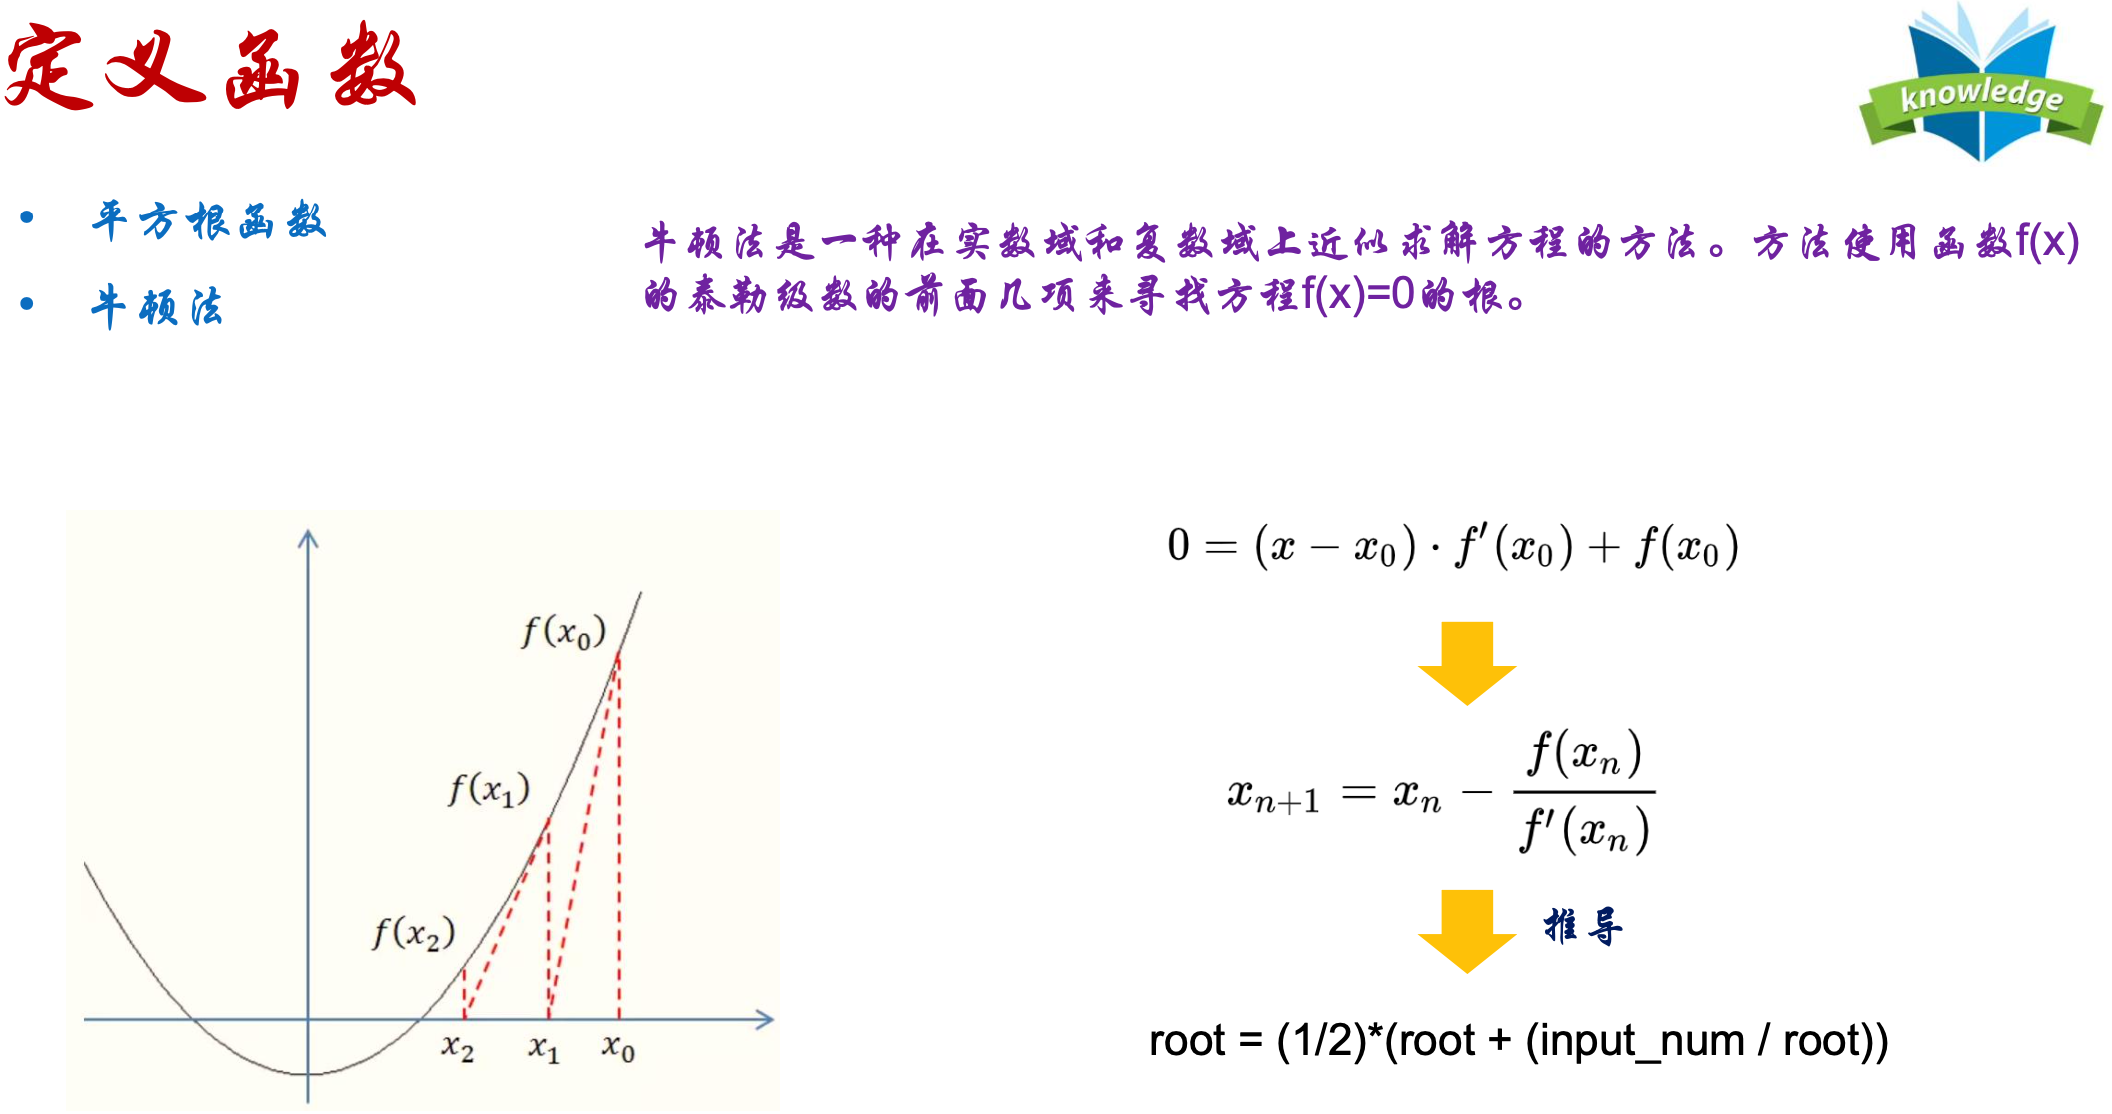

In [1]:
def squareroot(input_num):
    root = input_num/2
    for k in range(20):
        root = (1/2)* (root + (input_num/root))
    return root

print(squareroot(3))

1.7320508075688772


# 2. 約瑟夫問題

据说著名犹太历史学家 Josephus 有过以下的故事:

在罗马人占领乔塔帕特后, 39 个犹太人与 Josephus 及他的朋友躲到一个洞中,39 个犹太人决定宁愿死也
不要被敌人抓到，于是决定了一个自杀方式， 41 个人，排成一个圆圈，由第 1 个人开始报数,每报数到第 3 人。
该人就必须自杀，然后再由下一个重新报数,直到所有人都自杀身亡为止。

## Tip 1 約瑟夫環 Josephus problem or Josephus permutation

阿橋問題（有時也稱為約瑟夫斯置換），是一個出現在電腦科學和數學中的問題。在電腦編程的演算法中，類似問題又稱為約瑟夫環。人們站在一個等待被處決的圈子裡。 計數從圓圈中的指定點開始，並沿指定方向圍繞圓圈進行。 在跳過指定數量的人之後，處刑下一個人。 對剩下的人重複該過程，從下一個人開始，朝同一方向跳過相同數量的人，直到只剩下一個人，並被釋放。問題即，給定人數、起點、方向和要跳過的數字，選擇初始圓圈中的位置以避免被處決。

這個問題是以弗拉維奧·約瑟夫斯命名的，他是 1 世紀的一名猶太歷史學家。他在自己的日記中寫道，他和他的40個戰友被羅馬軍隊包圍在洞中。他們討論是自殺還是被俘，最終決定自殺，並以抽籤的方式決定誰殺掉誰。約瑟夫斯和另外一個人是最後兩個留下的人。約瑟夫斯說服了那個人，他們將向羅馬軍隊投降，不再自殺。約瑟夫斯把他的存活歸因於運氣或天意，他不知道是哪一個

https://en.wikipedia.org/wiki/Josephus_problem

https://zh.wikipedia.org/zh-tw/%E7%BA%A6%E7%91%9F%E5%A4%AB%E6%96%AF%E9%97%AE%E9%A2%98

In [2]:
people=[i for i in range(1,31)]
print('船上的人排队如下：',people)
pos=0                         #检查位置
goout=[]                      #记录投海的人的序号
number=len(people)            #人数
index=8
while number>15:              #大于15人，继续选择投海的人
    if index<number:          #9或9倍数的位置，且不能超过队伍人数
        goout.append(people[index]) #记录投海的人的序号
        del people[index]     #出队
        index=index+8         #寻找下第9个人
        number=len(people)    #重新获取人数
    else:                     #超过队伍人序号，从头开始继续数到9
        index=index-number    #从队伍头开始数数，要考虑队伍尾没有数的人数
print('下海的人序号：',goout)  #打印出队人序号
print('留下的人序号：',people) #打印留下来的人的序号

船上的人排队如下： [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
下海的人序号： [9, 18, 27, 6, 16, 26, 7, 19, 30, 12, 24, 8, 22, 5, 23]
留下的人序号： [1, 2, 3, 4, 10, 11, 13, 14, 15, 17, 20, 21, 25, 28, 29]


# 3. LeetCode 1. Two Sum 兩數之和

Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order.

给定一个整数数组 nums 和一个整数目标值 target，请你在该数组中找出 和为目标值 target  的那 两个 整数，并返回它们的数组下标。

你可以假设每种输入只会对应一个答案。但是，数组中同一个元素在答案里不能重复出现。

你可以按任意顺序返回答案。

Example 1:

```
Input: nums = [2,7,11,15], target = 9
Output: [0,1]
Explanation: Because nums[0] + nums[1] == 9, we return [0, 1].
```

Example 2:

```
Input: nums = [3,2,4], target = 6
Output: [1,2]
```

Example 3:

```
Input: nums = [3,3], target = 6
Output: [0,1]
```

## 思路

1. 用 For 將每個元素讀過一遍，然後將其逐一取出來一個個判斷，若目標為 9，找到元素 2 ，就會找 7，若找到元素 7 ，就會找 2。效率上沒有很理想。

2. 運用 Python 的字典可以直接去找。用 For 去找，剩下用 IF 來判斷該值有沒有在字典裡面。相對與第一種課堂範例來的理想。

In [3]:
class Solution(object):
   def twoSum(self, nums, target):
      required = {}
      for i in range(len(nums)):
         if target - nums[i] in required:
            return [required[target - nums[i]],i]
         else:
            required[nums[i]]=i
input_list = [ 2, 7, 11, 15]
target = 9
ob1 = Solution()
print(ob1.twoSum(input_list, target))

[0, 1]


In [4]:
class Solution(object):
   def twoSum(self, nums, target):
      for i in range(len(nums)):
         tmp = nums[i]
         remain = nums[i+1:]
         if target - tmp in remain:
                return[i, remain.index(target - tmp)+ i + 1]
input_list = [ 2, 7, 11, 15]
target = 9
ob1 = Solution()
print(ob1.twoSum(input_list, target))

[0, 1]


In [5]:
class Solution(object):
    def twoSum(self, nums, target):
        dict = {}
        for i in range(len(nums)):
            if target - nums[i] not in dict:
                dict[nums[i]] = i
            else:
                return [dict[target - nums[i]], i]
input_list = [ 2, 7, 11, 15]
target = 9
ob1 = Solution()
print(ob1.twoSum(input_list, target))

[0, 1]


# 4. 栈, Stack, 堆疊,应用 - 十进制转二进制

十進制 $233_{10}$ 以及對應的二進制表示 $11101001_{2}$

$233_{10} = 2 \times 10_{2} + 3 \times 10_{1} + 3 \times 10_{0}$

$ 11101001_{2} = 1 \times 2_{7} + 1 \times 2_{6} + 1 \times 2_{5} + 0 \times 2_{4}+ 1 \times 2_{3} + 0 \times 2_{2} + 0 \times 2_{1} + 1 \times 2_{0}$


```
def divideBy2(decNumber):
    remstack = Stack()
    while decNumber > 0 :
        rem = decNumber % 2
        remstack.push(rem)
        decNumber = decNumber // 2
    binString = ""
    while not remstack.isEmpty():
        binString = binString + str(remstack.pop())
    return binString
```
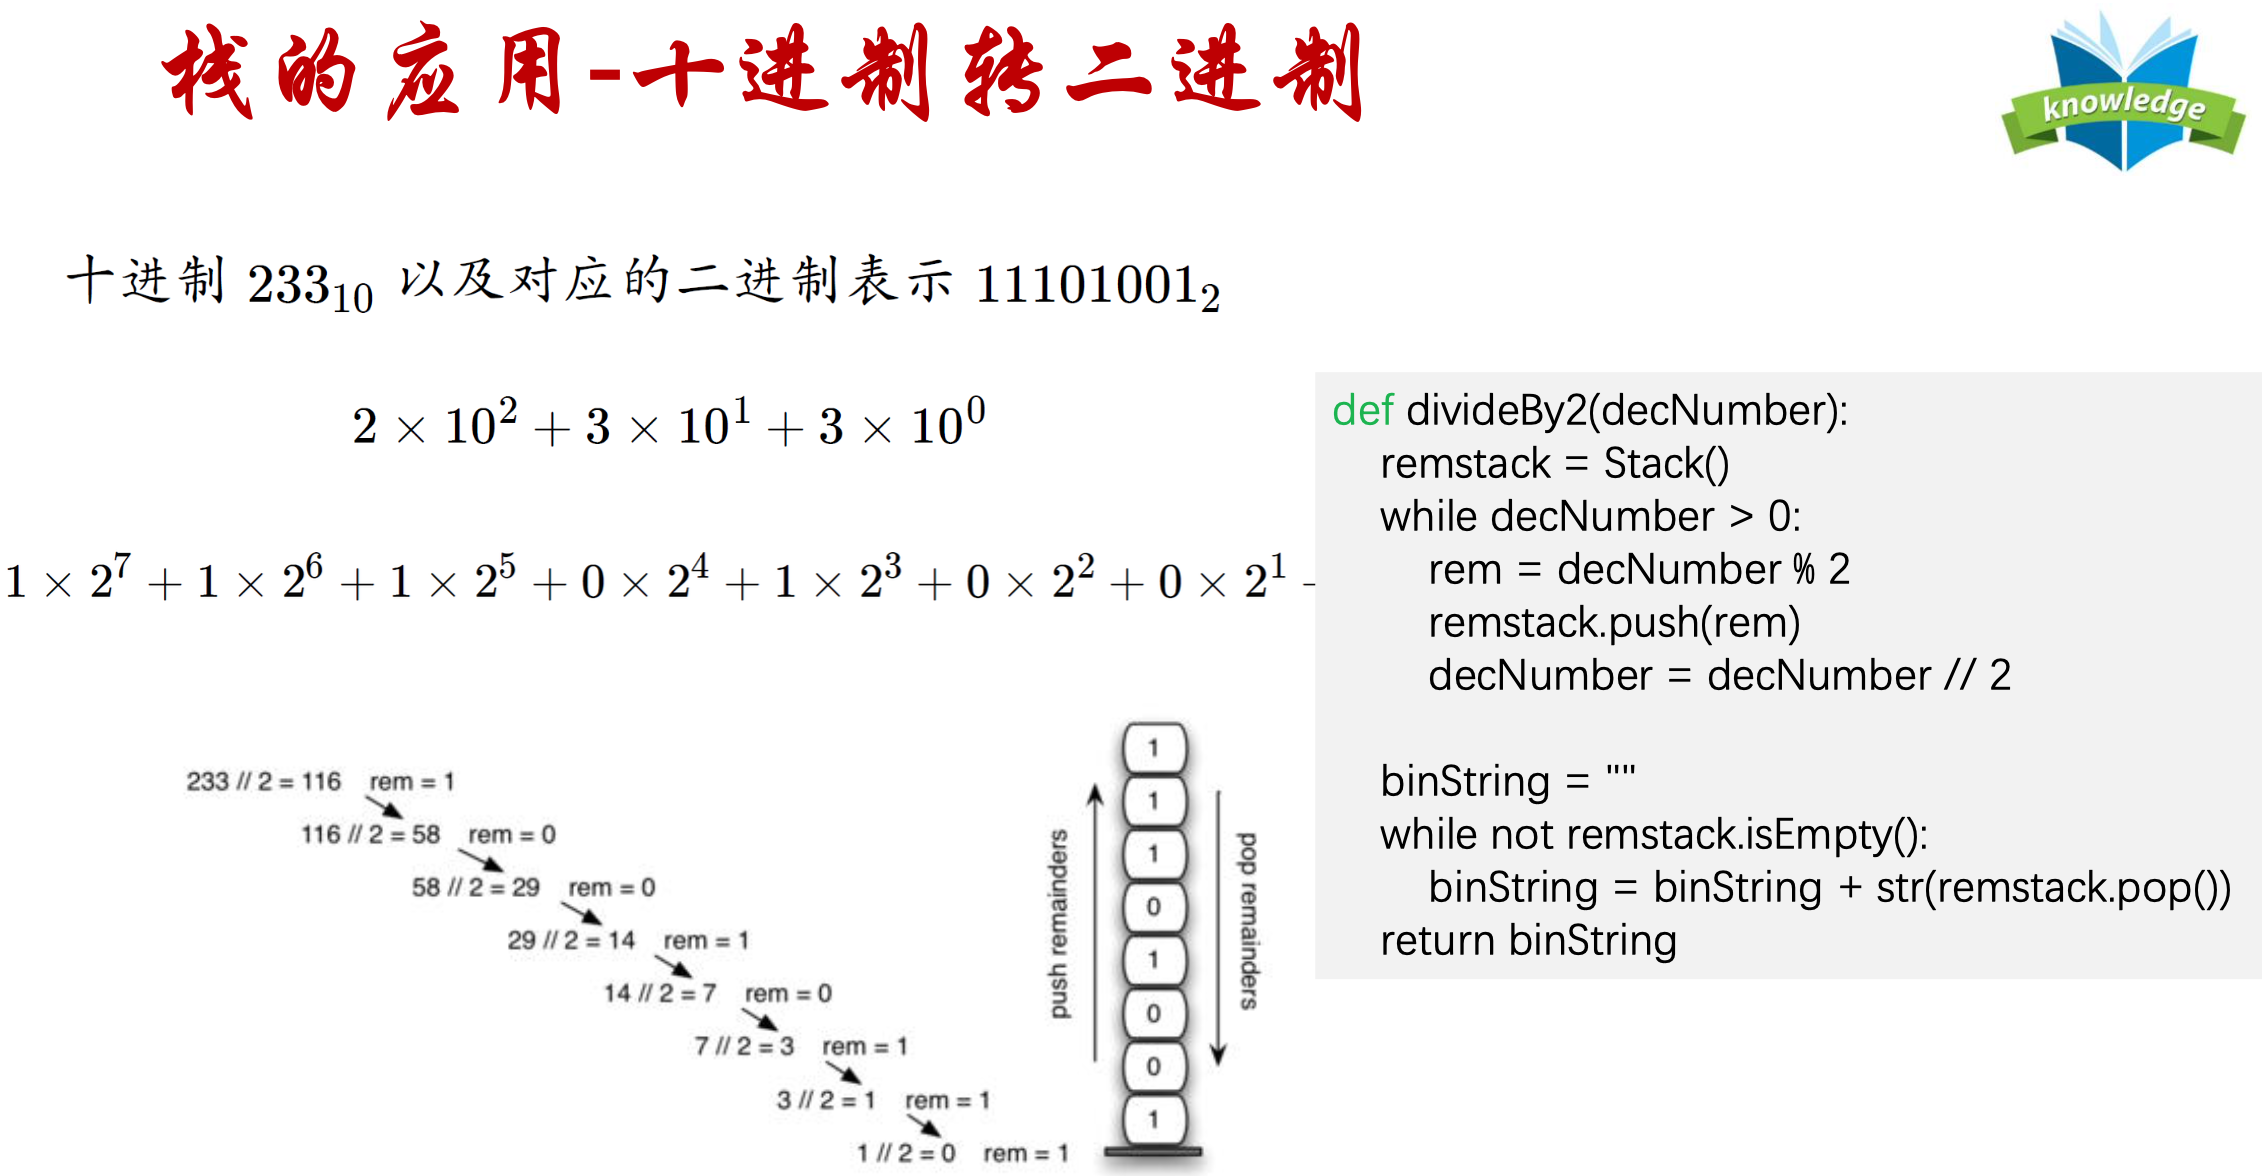

## 栈, Stack, 堆疊

栈(Last In First Out，LIFO)是一个项的有序集合，其 中添加移除新项总发生在同一端。这一端通常称为“顶部”。与顶部对应的端称为“底部”。

栈的抽象数据类型由以下结构和操作定义。栈被构造为项的有序集合，其中项被添加和从末端移除的位置称为“顶部”。

### 栈操作如下:
- Stack() 创建一个空的新栈。 它不需要参数，并返回一个空栈。

- push(item) 将一个新项添加到栈的顶部。它需要 item 做参数并不返回任何内容。

- pop() 从栈中删除顶部项。它不需要参数并返回 item 。栈被修改。

- peek() 从栈返回顶部项，但不会删除它。不需要参数。不修改栈。

- isEmpty() 测试栈是否为空。不需要参数，并返回布尔值。

- size() 返回栈中的 item 数量。不需要参数，并返回一个整数。

### 栈, Stack, 堆疊 - Python 實現

```
class Stack:
    def __init__(self):
        self.items = []
    def isEmpty(self):
        return self.items == []
    def push(self, item):
        self.items.append(item)
    def pop(self):
        return self.items.pop()
    def peek(self):
        return self.items[len(self.items) - 1]
    def size(self):
        return len(self.items)
```

In [6]:
class Stack:
    def __init__(self):
        self.items = []
    def isEmpty(self):
        return self.items == []
    def push(self, item):
        self.items.append(item)
    def pop(self):
        return self.items.pop()
    def peek(self):
        return self.items[len(self.items) - 1]
    def size(self):
        return len(self.items)

s = Stack()
print(s.isEmpty())
s.push(4)
s.push('dog')
print(s.peek())
s.push(True)
print(s.size())
print(s.isEmpty())
s.push(8.4)
print(s.pop())
print(s.pop())
print(s.size())

True
dog
3
False
8.4
True
2


In [7]:
class Stack:
    def __init__(self):
        self.items = []
    def isEmpty(self):
        return self.items == []
    def push(self, item):
        self.items.append(item)
    def pop(self):
        return self.items.pop()
    def peek(self):
        return self.items[len(self.items) - 1]
    def size(self):
        return len(self.items)

def divideBy2(decNumber):
    remstack = Stack()
    while decNumber > 0 :
        rem = decNumber % 2
        remstack.push(rem)
        decNumber = decNumber // 2
    binString = ""
    while not remstack.isEmpty():
        binString = binString + str(remstack.pop())
    return binString

print(divideBy2(100))

1100100


# 5. LeetCode 242. Valid Anagram 有效的字母异位词

有效的字母异位词 : 两个单词包含相同的字母，但是次序不同

Given two strings s and t, return true if t is an anagram of s, and false otherwise.

An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

给定两个字符串 s 和 t ，编写一个函数来判断 t 是否是 s 的字母异位词。

注意：若 s 和 t 中每个字符出现的次数都相同，则称 s 和 t 互为字母异位词。

Example 1:

```
Input: s = "anagram", t = "nagaram"
Output: true
```

Example 2:

```
Input: s = "rat", t = "car"
Output: false
```

Constraints - 提示:

- 1 <= s.length, t.length <= 5 * 10^4

- s and t consist of lowercase English letters.(s 和 t 仅包含小写字母)

Follow up - 进阶: What if the inputs contain Unicode characters? How would you adapt your solution to such a case?

如果输入字符串包含 unicode 字符怎么办？你能否调整你的解法来应对这种情况？


## 解题思路

- 可用打表的方式做。先把 s 中的每个字母都存在一个 26 个容量的数组里面，每个下标依次对应 26 个字母。s 中每个字母都对应表中一个字母，每出现一次就加 1。然后再扫字符串 t，每出现一个字母就在表里面减一。如果都出现了，最终表里面的值肯定都是 0 。最终判断表里面的值是否都是 0 即可，有非 0 的数都输出 false 。


In [8]:
# defaultdict 解
class Solution:
    def isAnagram(self, s: str, t: str) -> bool:
        from collections import defaultdict
        s_dict = defaultdict(int)
        t_dict = defaultdict(int)
        for x in s:
            s_dict[x] += 1
        for x in t:
            t_dict[x] += 1
        return s_dict == t_dict

# dic 解
class Solutiont:
    def isAnagram(self, s, t):
        dic1, dic2 = {}, {}
        for item in s:
            dic1[item] = dic1.get(item, 0) + 1
        for item in t:
            dic2[item] = dic2.get(item, 0) + 1
        return dic1 == dic2

s = "anagram"
t = "nagaram"
ob = Solution()
print(ob.isAnagram(s, t))

# ASCII 解
class Solutiont:
    def isAnagram(self, s, t):
        dic1, dic2 = [0]*26, [0]*26
        for item in s:
            dic1[ord(item) - ord('a')] += 1
        for item in t:
            dic2[ord(item) - ord('a')] += 1
        return dic1 == dic2

s = "anagram"
t = "nagaram"
ob = Solution()
print(ob.isAnagram(s, t))

class Solution:
    def isAnagram(self, s: str, t: str) -> bool:
        return sorted(s) == sorted(t)
s = "anagram"
t = "nagaram"
ob = Solution()
print(ob.isAnagram(s, t))

True
True
True


# 6. LeetCode 136. Single Number 只出现一次的数字

Given a non-empty array of integers nums, every element appears twice except for one. Find that single one.

You must implement a solution with a linear runtime complexity and use only constant extra space.

给定一个非空整数数组，除了某个元素只出现一次以外，其余每个元素均出现两次。找出那个只出现了一次的元素。

说明：你的算法应该具有线性时间复杂度。 你可以不使用额外空间来实现吗？


Example 1:

```
Input: nums = [2,2,1]
Output: 1
```

Example 2:

```
Input: nums = [4,1,2,1,2]
Output: 4
```

Example 3:

```
Input: nums = [1]
Output: 1
```

Constraints:

- $1 <= nums.length <= 3 * 10^{4}$
- $-3 * 10^{4} <= nums[i] <= 3 * 10^{4}$
- Each element in the array appears twice except for one element which appears only once.



In [9]:
class Solution:
    def singleNumber(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        a = 0
        for num in nums:
            a = a ^ num
        return a

In [10]:
from typing import List
class Solution:
    def singleNumber(self, nums: List[int]) -> int:
        return functools.reduce(int.__xor__,nums)

# 7. LeetCode 141. Linked List Cycle 环形链表

Given head, the head of a linked list, determine if the linked list has a cycle in it.

There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the next pointer. Internally, pos is used to denote the index of the node that tail's next pointer is connected to. Note that pos is not passed as a parameter.

Return true if there is a cycle in the linked list. Otherwise, return false.

给你一个链表的头节点 head ，判断链表中是否有环。

如果链表中有某个节点，可以通过连续跟踪 next 指针再次到达，则链表中存在环。 为了表示给定链表中的环，评测系统内部使用整数 pos 来表示链表尾连接到链表中的位置（索引从 0 开始）。注意：pos 不作为参数进行传递 。仅仅是为了标识链表的实际情况。

如果链表中存在环 ，则返回 true 。 否则，返回 false 。

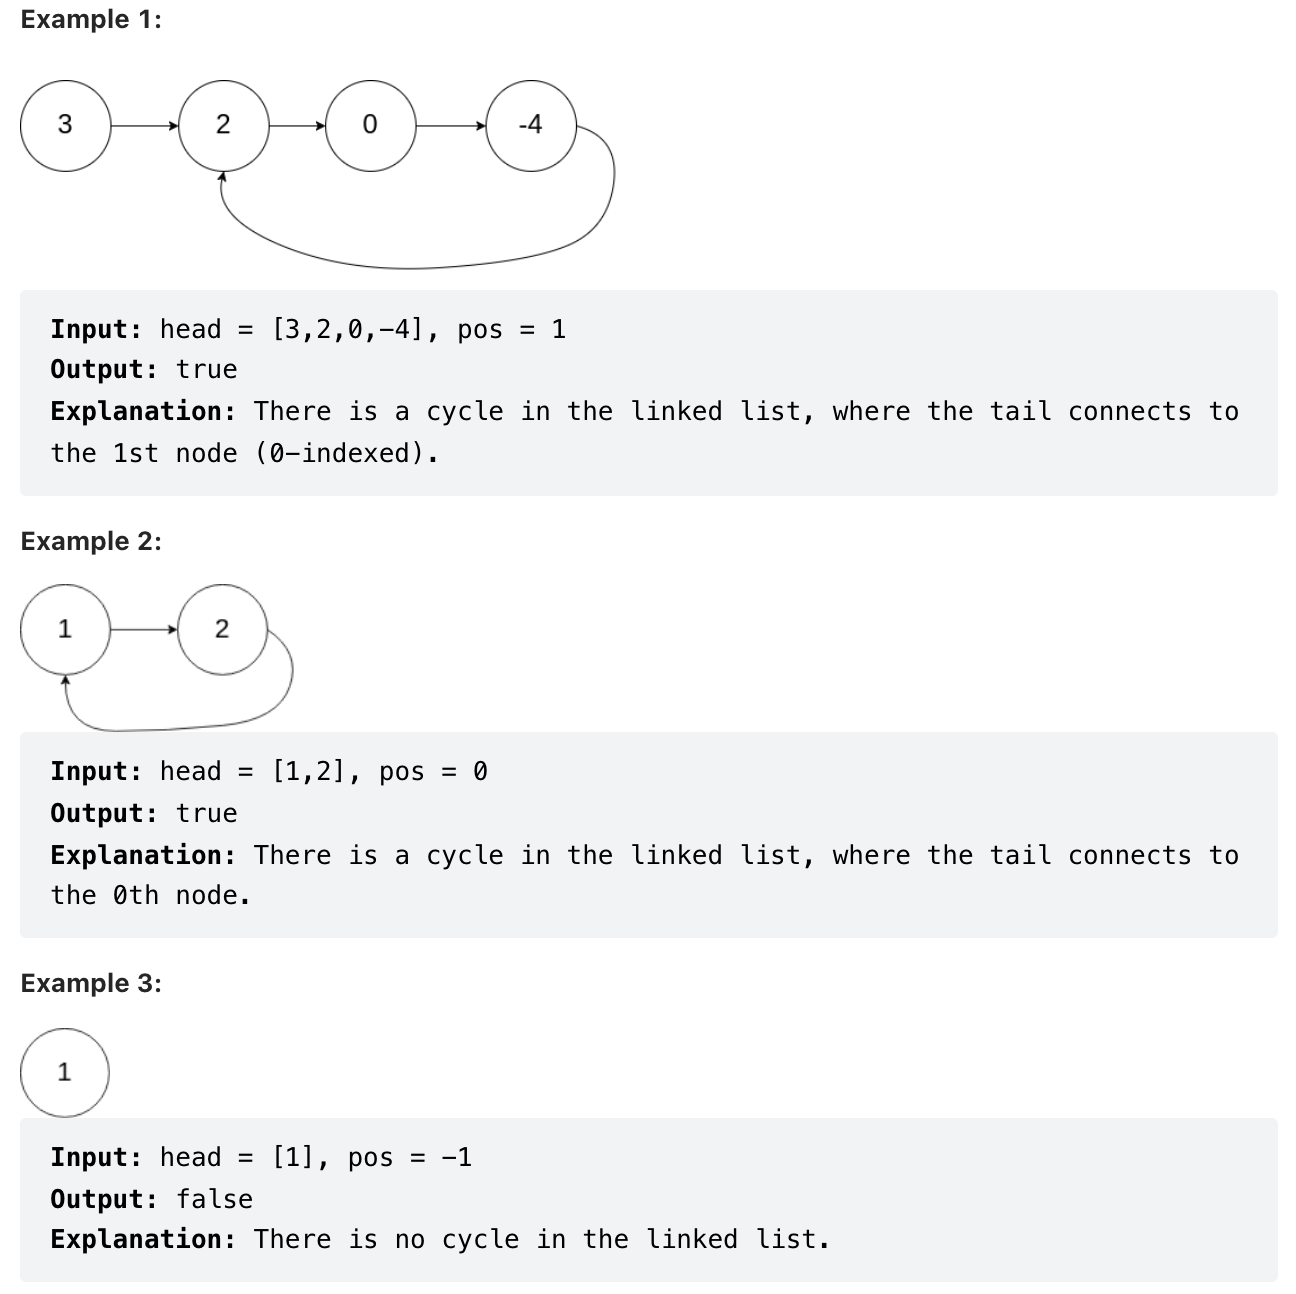

Example 1:

```
Input: head = [3,2,0,-4], pos = 1
Output: true
Explanation: There is a cycle in the linked list, where the tail connects to the 1st node (0-indexed).
链表中有一个环，其尾部连接到第二个节点。
```

Example 2:

```
Input: head = [1,2], pos = 0
Output: true
Explanation: There is a cycle in the linked list, where the tail connects to the 0th node.
链表中有一个环，其尾部连接到第一个节点。
```

Example 3:

```
Input: head = [1], pos = -1
Output: false
Explanation: There is no cycle in the linked list.
链表中没有环。
```

Constraints:

- The number of the nodes in the list is in the range(链表中节点的数目范围是) [0, $10^4$].
- $-10^5 <= Node.val <= 10^5$
- pos is -1 or a valid index in the linked-list.(pos 为 -1 或者链表中的一个 有效索引 。)

Follow up: Can you solve it using O(1) (i.e. constant) memory?(你能用 O(1)（即，常量）内存解决此问题吗？)

## 解题思路

给 2 个指针，一个指针是另外一个指针的下一个指针。快指针一次走 2 格，慢指针一次走 1 格。如果存在环，那么前一个指针一定会经过若干圈之后追上慢的指针。

## Reference

- Jserv Linux 核心設計/實作 : https://hackmd.io/@sysprog/linux2022-lab0

- 你所不知道的 C 語言: linked list 和非連續記憶體 : https://hackmd.io/@sysprog/c-linked-list


In [11]:
# Linked List Cycle
class Solution(object):
    def hasCycle(self, head):
        fast, slow = head, head
        while fast and fast.next:
            fast, slow = fast.next.next, slow.next
            if fast == slow:
                return True
        return False

# 8. 排序

- 冒泡排序

- 选择排序

- 归并排序

- 快速排序

- 插入排序


- 冒泡排序, 氣泡排序法, Bubble Sort

又稱交換排序法，原理是從第一筆資料開始，逐一比較相鄰兩筆資料，如果兩筆大小順序有誤則做交換，反之則不動，接者再進行下一筆資料比較，所有資料比較完第1回合後，可以確保最後一筆資料是正確的位置。


- 选择排序, 選擇排序法, Selection Sort

原理是反覆從未排序數列中找出最小值，將它與左邊的數做交換。可以有兩種方式排序，一為由大到小排序時，將最小值放到末端;若由小到大排序時，則將最小值放到前端。例如:未排序的數列中找到最小值的資料，和第1筆資料交換位置，再從剩下未排序的資料列中找到最小值的資料，和第2筆資料交換位置，以此類推。


- 归并排序, 合併排序法, Merge Sort

原理是會先將原始資料分割成兩個資料列，接著再將兩個資料繼續分割成兩個資料列，依此類推，直到無法再分割，也就是每組都只剩下一筆資料時，再兩兩合併各組資料，合併時也會進行該組排序，每次排序都是比較最左邊的資料，將較小的資料加到新的資料列中，依此類推，直到最後合併成一個排序好的資料列為止。


- 快速排序, 快速排序法, Quick Sort

又稱分割交換排序法，是目前公認效率極佳的演算法，使用了分治法(Divide and Conquer)的概念。原理是先從原始資料列中找一個基準值(Pivot)，接著逐一將資料與基準值比較，小於基準值的資料放在左邊，大於基準值的資料放在右邊，再將兩邊區塊分別再找出基準值，重複前面的步驟，直到排序完為止。


- 插入排序, 插入排序法, Insertion Sort

原理是逐一將原始資料加入已排序好資料中，並逐一與已排序好的資料作比較，找到對的位置插入。例如:已有2筆排序好資料，將第3筆資料與前面已排序好的2筆資料作比較，找到對的位置插入，再將第4筆資料與前面已排序好的3筆資料作比較，找到對的位置插入，以此類推。

In [12]:
# KP
# 冒泡排序
# code
def bubbleSort(alist):
    for passnum in range(len(alist) -1, 0, -1):
        for i in range(passnum):
            if alist[i] > alist[i + 1]:
                temp = alist[i]
                alist[i] = alist[i + 1]
                alist[i + 1] = temp
alist = [54, 26, 93, 17, 77, 31, 44, 55, 20]
bubbleSort(alist)
print(alist)

# Run Test
def bubbleSort(alist):
    for passnum in range(len(alist)-1, 0, -1):
        print(passnum)
        for i in range(passnum):
            if alist[i] > alist[i + 1]:
                temp = alist[i]
                alist[i] = alist[i+1]
                alist[i+1] = temp
            print(alist)

alist = [54, 26, 93, 17]
print("bubbleSort :")
print(alist)
bubbleSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]
bubbleSort :
[54, 26, 93, 17]
3
[26, 54, 93, 17]
[26, 54, 93, 17]
[26, 54, 17, 93]
2
[26, 54, 17, 93]
[26, 17, 54, 93]
1
[17, 26, 54, 93]
[17, 26, 54, 93]


In [13]:
# KP
# 选择排序

def selectionSort(alist):
    for fillslot in range(len(alist) - 1, 0, -1):
        positionOfMax = 0
        for location in range(1, fillslot + 1):
            if alist[location] > alist[positionOfMax]:
                positionOfMax = location
        temp = alist[fillslot]
        alist[fillslot] = alist[positionOfMax]
        alist[positionOfMax] = temp
alist = [ 54, 26, 93, 17, 77, 31, 44, 55 ,20]
selectionSort(alist)
print(alist)

# Run Test
def selectionSort(alist):
    for fillsolt in range(len(alist)-1,0,-1):
        print(fillsolt)
        positionOfMax = 0
        for location in range(1, fillsolt + 1):
            if alist[location] > alist[positionOfMax]:
                positionOfMax = location
        temp = alist[fillsolt]
        alist[fillsolt] = alist[positionOfMax]
        alist[positionOfMax] = temp
        print(alist)

print("selectionSort : ")
alist = [54, 26, 93, 17]
print(alist)
selectionSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]
selectionSort : 
[54, 26, 93, 17]
3
[54, 26, 17, 93]
2
[17, 26, 54, 93]
1
[17, 26, 54, 93]
[17, 26, 54, 93]


In [14]:
# KP
# 归并排序
def mergeSort(alist):
    if len(alist) > 1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]
        mergeSort(lefthalf)
        mergeSort(righthalf)
        l, j, k = 0,0,0
        while i < len(lefthalf) and j < len (righthalf):
            if lefthalf[i] < righthalf[j]:
                alist[k] = lefthalf[i]
                i = i + 1
            else :
                alist[k] = righthalf[j]
                j = j + 1
            k = k + 1
        while i < len(lefthalf):
            alist[k] = lefthalf[i]
            i = i + 1
            k = k + 1
        while j < len(righthalf):
            alist[k] = righthalf[j]
            j = j + 1
            k = k + 1

k = 0
def mergeSort(alist):
    global k
    k = k + 1
    print("invoke function %d" %(k))
    print("Splitting ", alist)
    if len(alist) > 1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]
        mergeSort(lefthalf)
        mergeSort(righthalf)
        i, j, k = 0,0,0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                alist[k] = lefthalf[i]
                i = i + 1
            else:
                alist[k] = righthalf[j]
                j = j + 1
            k = k + 1
        while i < len(lefthalf):
            alist[k] = lefthalf[i]
            i = i + 1
            k = k + 1
        while j < len(righthalf):
            alist[k] = righthalf[j]
            j = j + 1
            k = k + 1
    print("Merging ", alist)
print("mergeSort : ")
alist = [ 54, 26, 93, 17]
print(alist)
mergeSort(alist)
print(alist)

mergeSort : 
[54, 26, 93, 17]
invoke function 1
Splitting  [54, 26, 93, 17]
invoke function 2
Splitting  [54, 26]
invoke function 3
Splitting  [54]
Merging  [54]
invoke function 4
Splitting  [26]
Merging  [26]
Merging  [26, 54]
invoke function 3
Splitting  [93, 17]
invoke function 4
Splitting  [93]
Merging  [93]
invoke function 5
Splitting  [17]
Merging  [17]
Merging  [17, 93]
Merging  [17, 26, 54, 93]
[17, 26, 54, 93]


In [15]:
# KP
# 插入排序

def insertionSort(alist):
    for index in range(1, len(alist)):
        currentvalue = alist[index]
        position = index
        while position > 0 and alist[position - 1] > currentvalue:
            alist[position] = alist[position - 1]
            position = position - 1
        alist[position] = currentvalue
alist = [ 54, 26, 93, 17, 77, 31, 44, 55, 20]
insertionSort(alist)
print(alist)

def insertionSort(alist):
    for index in range(1, len(alist)):
        print(index)
        currentvalue = alist[index]
        position = index
        while position > 0 and alist[position - 1] > currentvalue:
            alist[position] = alist[position - 1]
            position = position - 1
        alist[position] = currentvalue
        print(alist)
print("insertionSort : ")
alist = [54, 26, 93, 17]
print(alist)
insertionSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]
insertionSort : 
[54, 26, 93, 17]
1
[26, 54, 93, 17]
2
[26, 54, 93, 17]
3
[17, 26, 54, 93]
[17, 26, 54, 93]


In [16]:
# KP
# 快速排序

def quickSort(alist):
    quickSortHelper(alist, 0, len(alist)-1)
def quickSortHelper(alist, first, last):
    if first < last:
        splitpoint = partition(alist, first, last)
        quickSortHelper(alist, first, splitpoint-1)
        quickSortHelper(alist, splitpoint+1, last)
def partition(alist,first,last):
    pivotvalue = alist[first]
    leftmark = first+1
    rightmark = last
    done = False
    while not done:
        while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
            leftmark = leftmark + 1
        while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
            rightmark = rightmark -1

        if rightmark < leftmark:
            done = True
        else:
            temp = alist[leftmark]
            alist[leftmark] = alist[rightmark]
            alist[rightmark] = temp
    temp = alist[first]
    alist[first] = alist[rightmark]
    alist[rightmark] = temp
    return rightmark


alist = [54,26,93,17,77,31,44,55,20]
print(alist)
quickSort(alist)
print(alist)

[54, 26, 93, 17, 77, 31, 44, 55, 20]
[17, 20, 26, 31, 44, 54, 55, 77, 93]


# 9. LeetCode 122. Best Time to Buy and Sell Stock II 买卖股票的最佳时机 II

You are given an integer array prices where prices[i] is the price of a given stock on the $i^{th}$ day.

On each day, you may decide to buy and/or sell the stock. You can only hold at most one share of the stock at any time. However, you can buy it then immediately sell it on the same day.

Find and return the maximum profit you can achieve.


给定一个数组 prices ，其中 prices[i] 表示股票第 i 天的价格。

在每一天，你可能会决定购买和/或出售股票。你在任何时候 最多 只能持有 一股 股票。你也可以购买它，然后在 同一天 出售。
返回 你能获得的 最大 利润 。

Example 1:

```
Input: prices = [7,1,5,3,6,4]
Output: 7
Explanation: Buy on day 2 (price = 1) and sell on day 3 (price = 5), profit = 5-1 = 4.
Then buy on day 4 (price = 3) and sell on day 5 (price = 6), profit = 6-3 = 3.
Total profit is 4 + 3 = 7.
```
在第 2 天（股票价格 = 1）的时候买入，在第 3 天（股票价格 = 5）的时候卖出, 这笔交易所能获得利润 = 5-1 = 4 。
     随后，在第 4 天（股票价格 = 3）的时候买入，在第 5 天（股票价格 = 6）的时候卖出, 这笔交易所能获得利润 = 6-3 = 3 。


Example 2:

```
Input: prices = [1,2,3,4,5]
Output: 4
Explanation: Buy on day 1 (price = 1) and sell on day 5 (price = 5), profit = 5-1 = 4.
Total profit is 4.
```

在第 1 天（股票价格 = 1）的时候买入，在第 5 天 （股票价格 = 5）的时候卖出, 这笔交易所能获得利润 = 5-1 = 4 。
     注意你不能在第 1 天和第 2 天接连购买股票，之后再将它们卖出。因为这样属于同时参与了多笔交易，你必须在再次购买前出售掉之前的股票。


Example 3:

```
Input: prices = [7,6,4,3,1]
Output: 0
Explanation: There is no way to make a positive profit, so we never buy the stock to achieve the maximum profit of 0.
```

在这种情况下, 没有交易完成, 所以最大利润为 0。

Constraints:

- $1 <= prices.length <= 3 * 10^4$
- $0 <= prices[i] <= 10^4$

## 解题思路

- 给定一个数组，它的第 i 个元素是一支给定股票第 i 天的价格。设计一个算法来计算你所能获取的最大利润。你可以尽可能地完成更多的交易（多次买卖一支股票）。注意：你不能同时参与多笔交易（你必须在再次购买前出售掉之前的股票）。

- 要求输出最大收益，这一题不止买卖一次，可以买卖多次，买卖不能在同一天内操作。

- 最大收益来源，必然是每次跌了就买入，涨到顶峰的时候就抛出。只要有涨峰就开始计算赚的钱，连续涨可以用两两相减累加来计算，两两相减累加，相当于涨到波峰的最大值减去谷底的值。这一点看通以后，题目非常简单。

In [17]:
# 122(KP) 
class Solution:
    def maxProfit (self, prices):
        if len(prices) <= 1:
            return 0
        total = 0
        for i in range(1, len(prices)):
            if prices[i] > prices[i-1]:
                total += prices[i] - prices[i-1]
        return total
if __name__ == '__main__':
    # prices = [ 6, 1, 3, 2, 4, 7]
    prices = [7, 1, 5, 3, 6,4]
    # prices = [1, 2, 3, 4, 5]
    print(Solution().maxProfit(prices))

7


# 10. LeetCode 392. Is Subsequence 判断子序列

Given two strings s and t, return true if s is a subsequence of t, or false otherwise.

A subsequence of a string is a new string that is formed from the original string by deleting some (can be none) of the characters without disturbing the relative positions of the remaining characters. (i.e., "ace" is a subsequence of "abcde" while "aec" is not).

给定字符串 s 和 t ，判断 s 是否为 t 的子序列。

字符串的一个子序列是原始字符串删除一些（也可以不删除）字符而不改变剩余字符相对位置形成的新字符串。（例如，"ace"是"abcde"的一个子序列，而"aec"不是）。

进阶：

如果有大量输入的 S，称作 S1, S2, ... , Sk 其中 k >= 10亿，你需要依次检查它们是否为 T 的子序列。在这种情况下，你会怎样改变代码？


Example 1:

```
Input: s = "abc", t = "ahbgdc"
Output: true
```

Example 2:

```
Input: s = "axc", t = "ahbgdc"
Output: false
```

Constraints:

- $0 <= s.length <= 100$
- $0 <= t.length <= 10^4$
- s and t consist only of lowercase English letters.

两个字符串都只由小写字符组成。


## 解题思路

- 给定字符串 s 和 t ，判断 s 是否为 t 的子序列。你可以认为 s 和 t 中仅包含英文小写字母。字符串 t 可能会很长（长度 ~= 500,000），而 s 是个短字符串（长度 <=100）。字符串的一个子序列是原始字符串删除一些（也可以不删除）字符而不改变剩余字符相对位置形成的新字符串。（例如，“ace"是"abcde"的一个子序列，而"aec"不是）。

- 给定 2 个字符串 s 和 t，问 s 是不是 t 的子序列。注意 s 在 t 中还需要保持 s 的字母的顺序。

- 贪心算法。

In [18]:
class Solution:
    def isSubsequence(self, s, t):
        if not s:
            return True
        i, l_s = 0, len(s)
        for v in t:
            if s[i] == v:
                i += 1
            if i == l_s:
                return True
        return False
if __name__ == '__main__':
    print(Solution().isSubsequence('dck', 'goodluck'))

True


# 11. LeetCode 263. Ugly Number 丑数

An ugly number is a positive integer whose prime factors are limited to 2, 3, and 5.

Given an integer n, return true if n is an ugly number.

判断一个数字是否是“丑陋数字”，“丑陋数字”的定义是一个正数，并且因子只包含 2，3，5 。


Example 1:

```
Input: n = 6
Output: true
Explanation: 6 = 2 × 3
```

Example 2:

```
Input: n = 1
Output: true
Explanation: 1 has no prime factors, therefore all of its prime factors are limited to 2, 3, and 5.
```

没有质因数，因此它的全部质因数是 {2, 3, 5} 的空集。习惯上将其视作第一个丑数。

Example 3:

```
Input: n = 14
Output: false
Explanation: 14 is not ugly since it includes the prime factor 7.
```

14 不是丑数，因为它包含了另外一个质因数 7 。

Constraints:

- $-2^{31} <= n <= 2^{31} - 1$


## 解题思路

判断一个数字是否是“丑陋数字”，“丑陋数字”的定义是一个正数，并且因子只包含 2，3，5 。


In [19]:
class Solution:
    def isUgly(self, num):
        if num == 0:
            return False
        for i in [2,3,5]:
            while num % i == 0:
                num /= i
        return num == 1
if __name__ == "__main__":
    print(Solution().isUgly(18))
    print(Solution().isUgly(14))

True
False


# 12. 貪心法

贪心法，又称贪心算法、贪婪算法:在对问题求解时， 总是做出在当前看来是最好的选择。

简单地说，问题能够分解成子问题来解决，子问题的 最优解能递推到最终问题的最优解。这种子问题最优 解成为最优子结构。

# 13. 貪心法 - 找最少硬币

以 26 分递归换硬币为例:

coinValueList = [1,5,10,25]

change = 26

$$
\text { numCoins }=\min \left\{\begin{array}{l}
1+\text { numCoins }(\text { originalamount }-1) \\
1+\text { numCoins }(\text { originalamount }-5) \\
1+\text { numCoins }(\text { originalamount }-10) \\
1+\text { numCoins }(\text { originalamount }-25)
\end{array}\right.
$$
                               
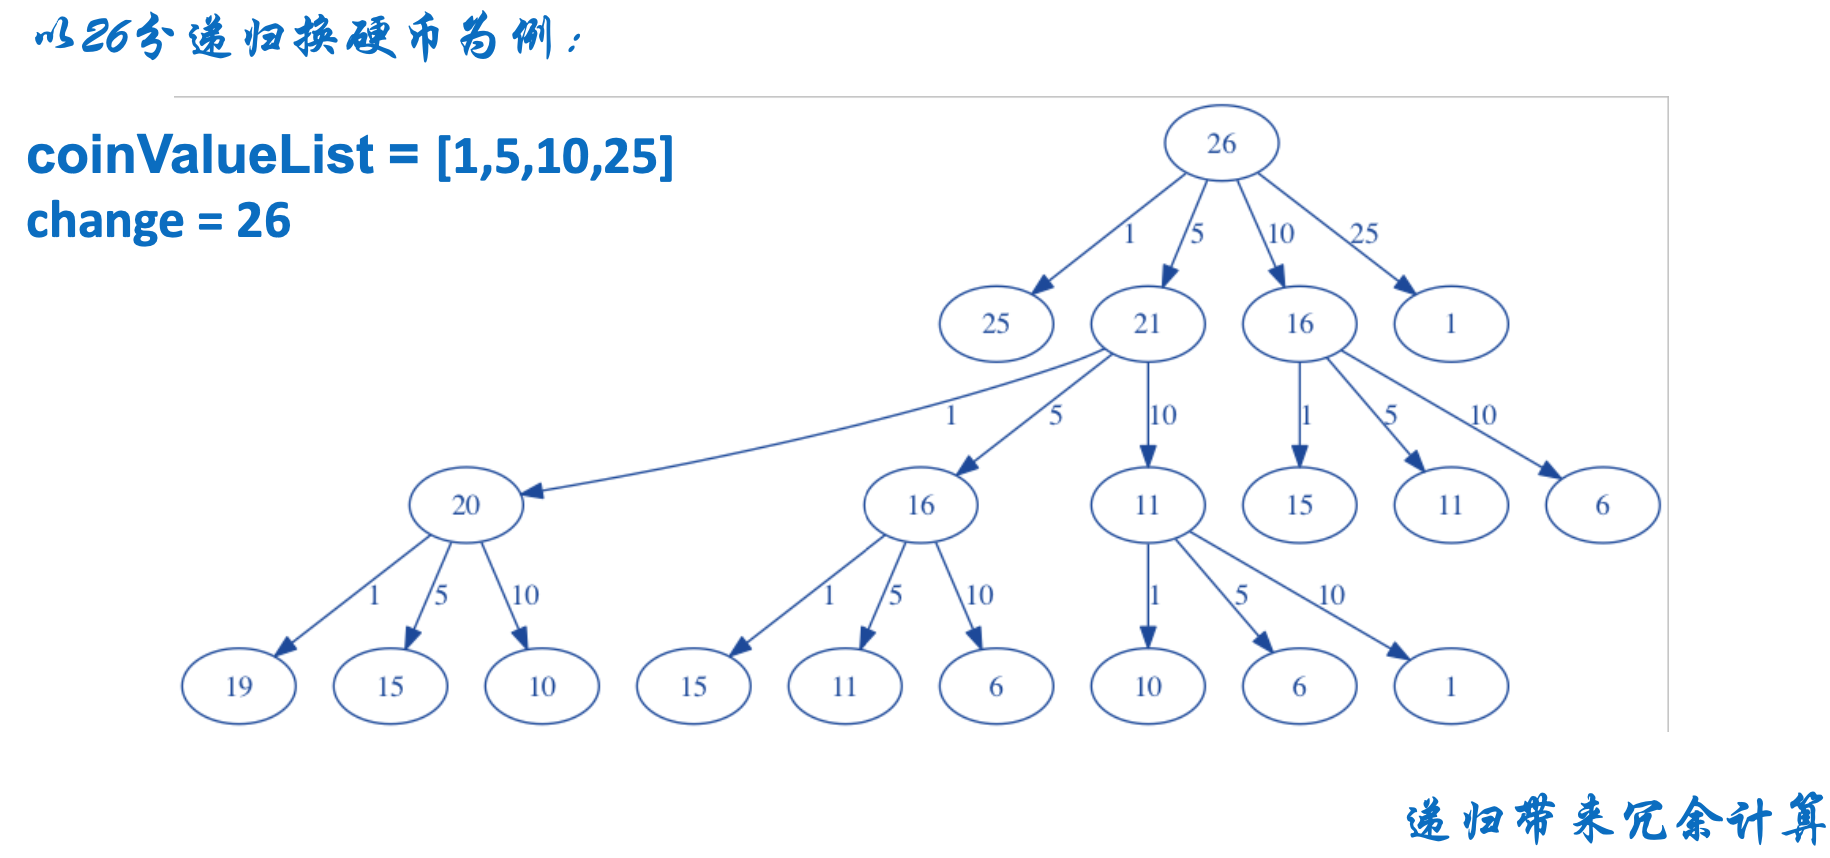

## 找最少硬币

### (1) 自上而下，递归求解

In [20]:
def recMC( coinValueList, change):
    minCoins = change
    if change in coinValueList:
        return 1
    else:
        for i in [c for c in coinValueList if c <= change]:
            numCoins = 1 + recMC(coinValueList, change - i)
            if numCoins < minCoins:
                minCoins = numCoins
    return minCoins

### (2) 加入“备忘录”，去除冗余的递归求解

In [21]:
def recMC(coinValueList, change, knownResults):
    minCoins = change
    if change in coinValueList:
        knownResults[change] = 1
        return 1
    elif knownResults[change] > 0:
        return knownResults[change]
    else:
        for i in [c for c in coinValueList if c <= change]:
            numCoins = 1 + recDC(coinValueList, change - i, knownResults)
            if numCoins < minCoins:
                minCoins = numCoins
                knownResults[change] = minCoins
    return minCoins

### (3) 自下而上，动态规划求解，状态转移方程

$$
\text { numCoins }=\min \left\{\begin{array}{l}
1+\text { numCoins }(\text { originalamount }-1) \\
1+\text { numCoins }(\text { originalamount }-5) \\
1+\text { numCoins }(\text { originalamount }-10) \\
1+\text { numCoins }(\text { originalamount }-25)
\end{array}\right.
$$

In [22]:
def dpMakeChange(coinValueList, change, minCoins):
    for cents in range(change + 1):
        coinCount = cents
        for j in [c for c in coinValueList if c <= cents]:
            if minCoins[cents - j] + 1 < coinCount:
                coinCount = minCoins[cents - j] + 1
        minCoins[cents] = coinCount
    return minCoins[change]

### (4) 带自动找零功能，动态规划求解

In [23]:
def dpMakeChange(coinValueList, change, minCoins, coinsUsed):
    for cents in range(change + 1):
        coinCount = cents
        newCoin = 1
        for j in [c for c in coinValueList if c <= cents]:
            if minCoins[cents - j] + 1 < coinCount:
                coinCount = minCoins[cents - j] + 1
                newCoin = j
        minCoins[cents] = coinCount
        coinsUsed[cents] = newCoin
    return minCoins[change]
def printCoins(coinsUsed, change):
    coin = change
    while coin > 0:
        thisCoin = coinsUsed[coin]
        print(thisCoin)
        coin = coin - thisCoin

# 14. 动态规划 Dynamic Programming, DP

动态规划算法通常基于一个递推公式及一个或多个初始状态。当前子问题的解将由上一次子问题的解推出。

使用动态规划来解题只需要多项式时间复杂度，因此它比递归法、暴力法等要快许多。

状态 : 用来描述该问题的子问题的解。

状态转移方程 : 描述状态之间是如何转移的关系式。

DP 的基本原理 : 找到某个状态的最优解，然后在其帮助下，找到下一个状态的最优解。

1. 递归 + 记忆化→递推

2. 状态的定义: dp[n], dp[i][j], ...

3. 状态转移方程:dp[n] = best_of(dp[n-1], dp[n-2], ... ) 

4. 最优子结构

## Tip

```
1. 所有的例题都会做(知识点)
2. 懂得尽力将遇到的问题转化为相似的例题
3. 可以对新的问题用动态规划求解
```

## Example

1. 找最少硬币

2. 爬楼梯

3. 走方格

4. 从一维到二维的扩展

5. 矩阵相乘加括号


# 21. 爬楼梯 - LeetCode 70. Climbing Stairs 爬楼梯

You are climbing a staircase. It takes n steps to reach the top.

Each time you can either climb 1 or 2 steps. In how many distinct ways can you climb to the top?

假设你正在爬楼梯。需要 n 阶你才能到达楼顶。

每次你可以爬 1 或 2 个台阶。你有多少种不同的方法可以爬到楼顶呢？

Example 1:

```
Input: n = 2
Output: 2
Explanation: There are two ways to climb to the top.
1. 1 step + 1 step
2. 2 steps
```

解释：有两种方法可以爬到楼顶。
1. 1 阶 + 1 阶
2. 2 阶

Example 2:

```
Input: n = 3
Output: 3
Explanation: There are three ways to climb to the top.
1. 1 step + 1 step + 1 step
2. 1 step + 2 steps
3. 2 steps + 1 step
```

解释：有三种方法可以爬到楼顶。
1. 1 阶 + 1 阶 + 1 阶
2. 1 阶 + 2 阶
3. 2 阶 + 1 阶

Constraints:

- 1 <= n <= 45


## 解题思路

- 假设你正在爬楼梯。需要 n 阶你才能到达楼顶。每次你可以爬 1 或 2 个台阶。你有多少种不同的方法可以爬到楼顶呢？注意：给定 n 是一个正整数。

- 简单的 DP，经典的爬楼梯问题。一个楼梯可以由 n-1 和 n-2 的楼梯爬上来。

- 这一题求解的值就是斐波那契数列。


In [24]:
# 70 爬樓梯 (KP)
class Solution:
    def climbStairs(self, n):
        prev, current = 0, 1
        for i in range(n):
            prev, current = current, prev + current
        return current

##  爬樓梯，状态转移方程，空间节省策略

$$𝑑𝑝[𝑛] = 𝑑𝑝 [𝑛 − 1] + 𝑑𝑝 [𝑛 − 2]$$

# 22. 走方格


## 自上而下

## 自下而上

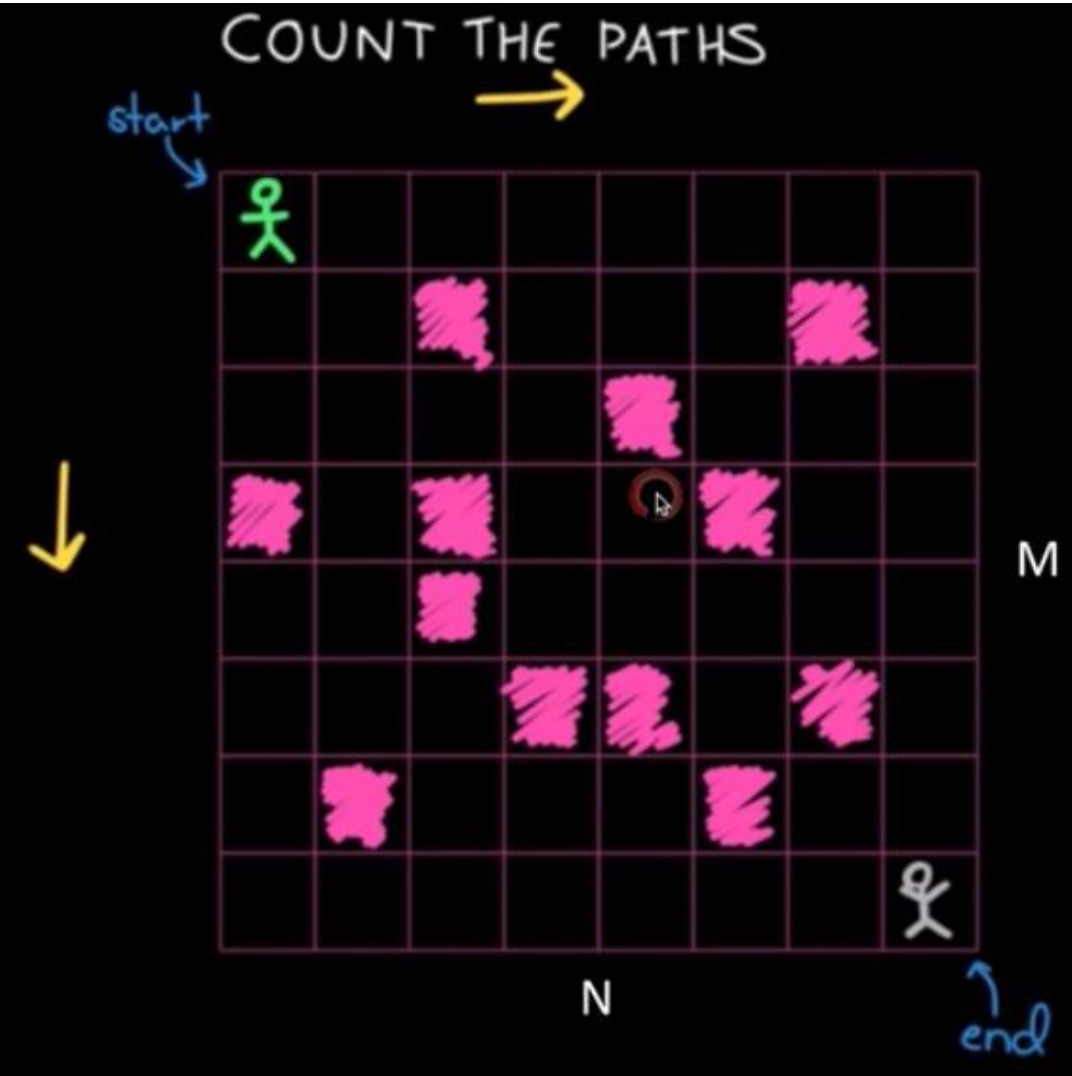

##  𝑑𝑝[i][j]

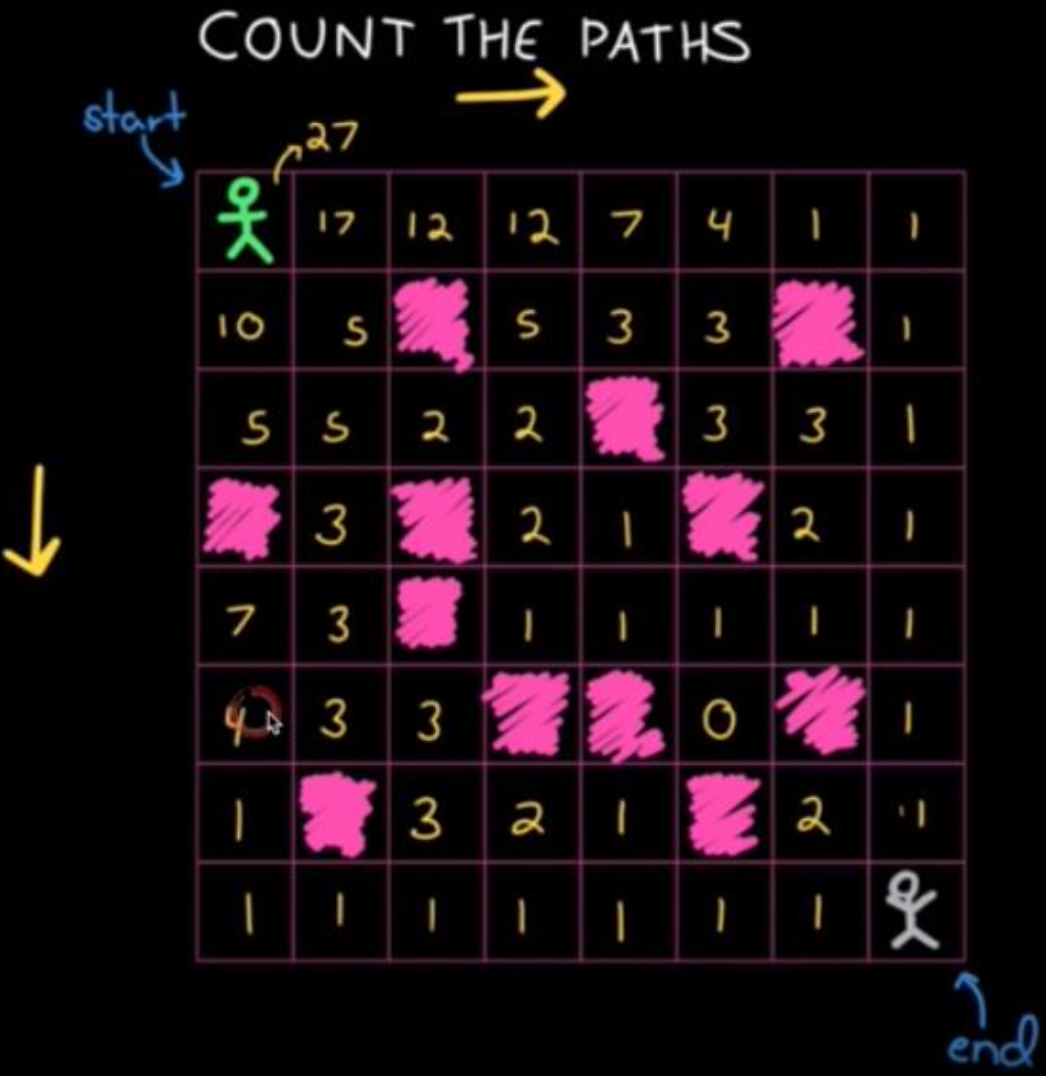

# 23. LeetCode 62. Unique Paths 不同路径

There is a robot on an m x n grid. The robot is initially located at the top-left corner (i.e., grid[0][0]). The robot tries to move to the bottom-right corner (i.e., grid[m - 1][n - 1]). The robot can only move either down or right at any point in time.

Given the two integers m and n, return the number of possible unique paths that the robot can take to reach the bottom-right corner.

The test cases are generated so that the answer will be less than or equal to $2 * 10^9$

一个机器人位于一个 m x n 网格的左上角 （起始点在下图中标记为 “Start” ）。

机器人每次只能向下或者向右移动一步。机器人试图达到网格的右下角（在下图中标记为 “Finish” ）。

问总共有多少条不同的路径？

Example 1:

```
Input: m = 3, n = 7
Output: 28
```

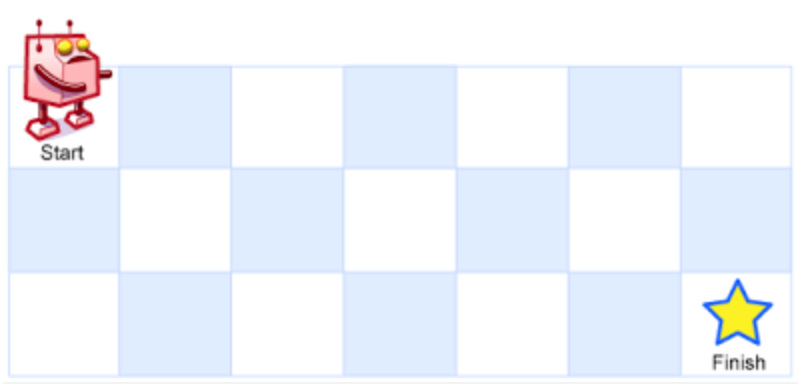

Example 2:

```
Input: m = 3, n = 2
Output: 3
Explanation: From the top-left corner, there are a total of 3 ways to reach the bottom-right corner:
1. Right -> Down -> Down
2. Down -> Down -> Right
3. Down -> Right -> Down
```

从左上角开始，总共有 3 条路径可以到达右下角。

1. 向右 -> 向下 -> 向下

2. 向下 -> 向下 -> 向右

3. 向下 -> 向右 -> 向下


Example 3:

```
输入：m = 7, n = 3
输出：28
```


Example 4:

```
输入：m = 3, n = 3
输出：6
```

Constraints:

- 1 <= m, n <= 100

- 题目数据保证答案小于等于 $2 * 10^9$


## 解题思路

- 一个机器人位于一个 m x n 网格的左上角 （起始点在下图中标记为“Start” ）。机器人每次只能向下或者向右移动一步。机器人试图达到网格的右下角（在下图中标记为“Finish”）。问总共有多少条不同的路径？

- 这是一道简单的 DP 题。输出地图上从左上角走到右下角的走法数。

- 由于机器人只能向右走和向下走，所以地图的第一行和第一列的走法数都是 1，地图中任意一点的走法数是 dp[i][j] = dp[i-1][j] + dp[i][j-1]


In [25]:
# 走方格
# 62
class Solution(object):
    def uniquePaths(self, m, n):
        dp = [[0 for _ in range(n)] for _ in range(m)]
        for index in range(m):
            dp[index][0] = 1
        for index in range(n):
            dp[0][index] = 1
        for index_i in range(1, m): 
            for index_j in range(1, n):
                dp[index_i][index_j] = dp[index_i-1][index_j] + dp[index_i][index_j-1]
        return dp[m-1][n-1]
if __name__ == "__main__":
    print(Solution().uniquePaths(3,2))
    print(Solution().uniquePaths(9,4))

3
165


# 24. LeetCode 63. Unique Paths II 不同路径 II

A robot is located at the top-left corner of a m x n grid (marked 'Start' in the diagram below).

The robot can only move either down or right at any point in time. The robot is trying to reach the bottom-right corner of the grid (marked 'Finish' in the diagram below).

Now consider if some obstacles are added to the grids. How many unique paths would there be?

An obstacle and space is marked as 1 and 0 respectively in the grid.

一个机器人位于一个 m x n 网格的左上角 （起始点在下图中标记为 “Start” ）。

机器人每次只能向下或者向右移动一步。机器人试图达到网格的右下角（在下图中标记为 “Finish”）。

现在考虑网格中有障碍物。那么从左上角到右下角将会有多少条不同的路径？

网格中的障碍物和空位置分别用 1 和 0 来表示。

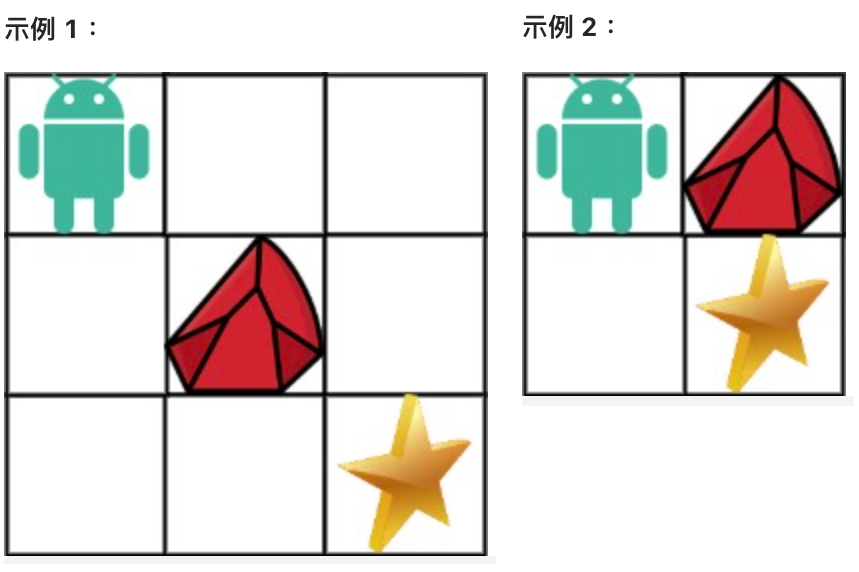

Example 1:

```
Input: obstacleGrid = [[0,0,0],[0,1,0],[0,0,0]]
Output: 2
Explanation: There is one obstacle in the middle of the 3x3 grid above.
There are two ways to reach the bottom-right corner:
1. Right -> Right -> Down -> Down
2. Down -> Down -> Right -> Right
```

解释：3x3 网格的正中间有一个障碍物。
从左上角到右下角一共有 2 条不同的路径：
1. 向右 -> 向右 -> 向下 -> 向下
2. 向下 -> 向下 -> 向右 -> 向右


Example 2:

```
Input: obstacleGrid = [[0,1],[0,0]]
Output: 1
```


Constraints:

- m == obstacleGrid.length
- n == obstacleGrid[i].length
- 1 <= m, n <= 100
- obstacleGrid[i][j] is 0 or 1.



## 解题思路

- 一个机器人位于一个 m x n 网格的左上角 （起始点在下图中标记为“Start” ）。机器人每次只能向下或者向右移动一步。机器人试图达到网格的右下角（在下图中标记为“Finish”）。现在考虑网格中有障碍物。那么从左上角到右下角将会有多少条不同的路径？

- 这一题是第 62 题的加强版。也是一道考察 DP 的简单题。

- 这一题比第 62 题增加的条件是地图中会出现障碍物，障碍物的处理方法是 dp[i][j]=0。

- 需要注意的一种情况是，起点就是障碍物，那么这种情况直接输出 0 。


In [26]:
class Solution(object):
    def uniquePathsWithObstacles(self, obstacleGrid):
        m, n = len(obstacleGrid), len(obstacleGrid[0])
        dp = [[0 for _ in range(n)] for _ in range(m)]

        if obstacleGrid[0][0] == 1 or obstacleGrid[m-1][n-1] == 1: 
            return 0
        dp[0][0] = 1
        for index in range(1, m):
            if obstacleGrid[index][0] == 1:
                dp[index][0] = 0
            else:
                dp[index][0] = dp[index-1][0]
        for index in range(1, n):
            if obstacleGrid[0][index] == 1:
                dp[0][index] = 0
            else:
                dp[0][index] = dp[0][index-1]
        for index_i in range(1, m):
            for index_j in range(1, n):
                if obstacleGrid[index_i][index_j] == 1:
                    dp[index_i][index_j] = 0
                else:
                    dp[index_i][index_j] = dp[index_i-1][index_j] + dp[index_i][index_j-1] 
        return dp[m-1][n-1]

# 25. 1 維到 2 維

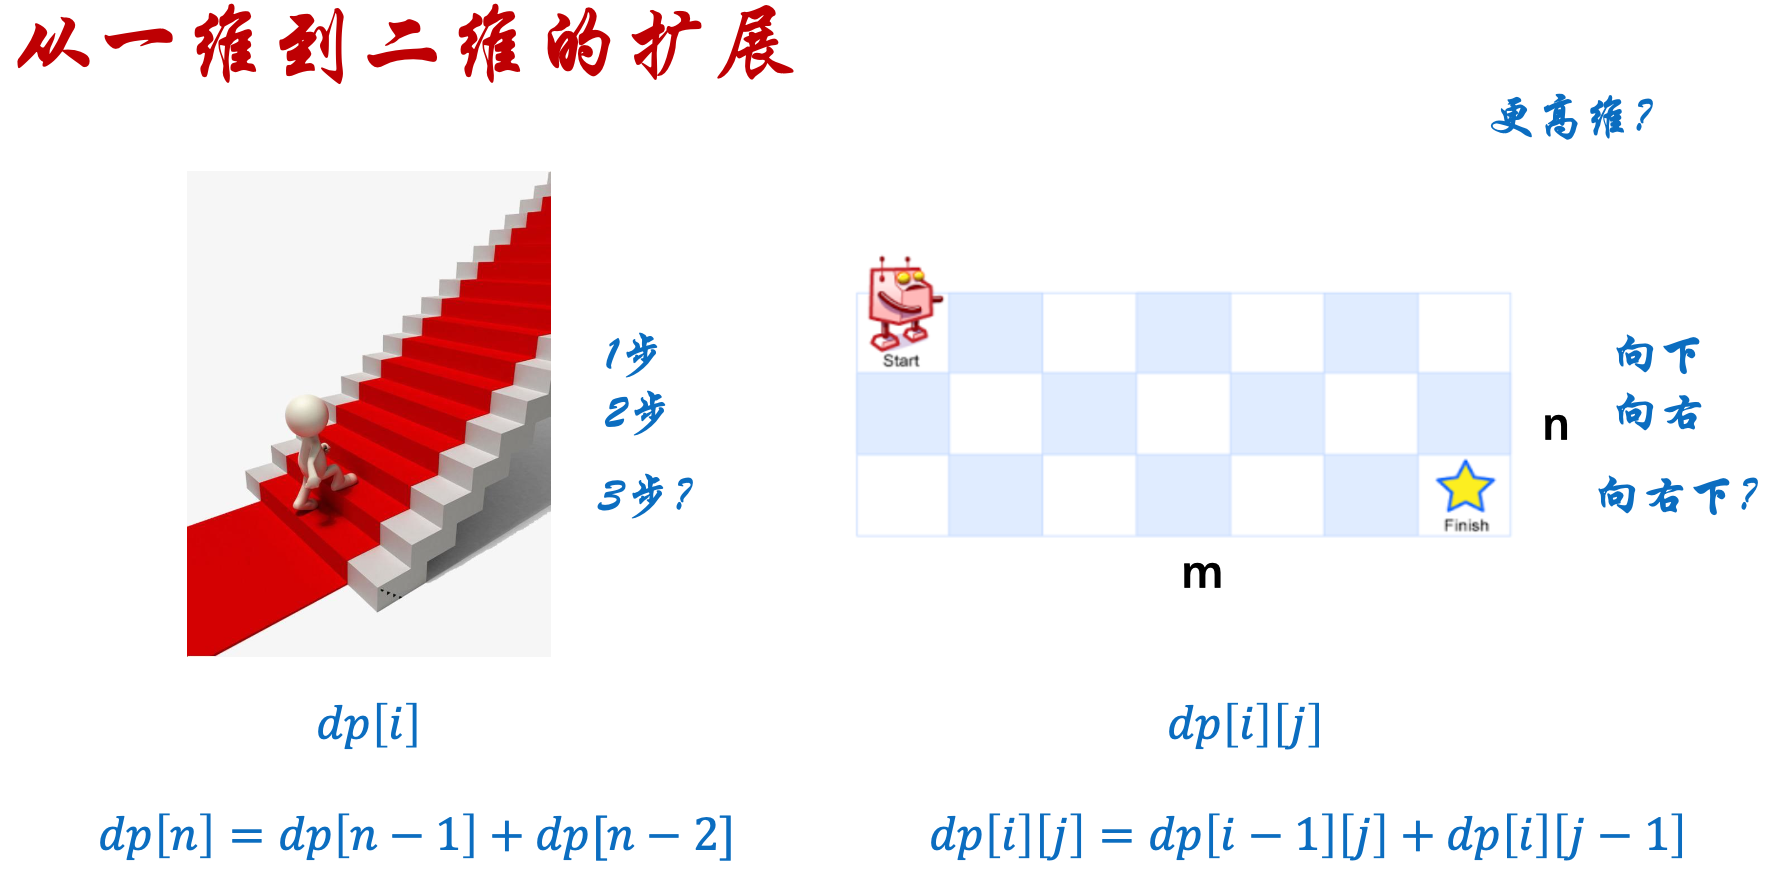

# 25. LeetCode 746. Min Cost Climbing Stairs

You are given an integer array cost where cost[i] is the cost of ith step on a staircase. Once you pay the cost, you can either climb one or two steps.

You can either start from the step with index 0, or the step with index 1.

Return the minimum cost to reach the top of the floor.

给你一个整数数组 cost ，其中 cost[i] 是从楼梯第 i 个台阶向上爬需要支付的费用。一旦你支付此费用，即可选择向上爬一个或者两个台阶。

你可以选择从下标为 0 或下标为 1 的台阶开始爬楼梯。

请你计算并返回达到楼梯顶部的最低花费。


Example 1:

```
Input: cost = [10,15,20]
Output: 15
Explanation: You will start at index 1.
- Pay 15 and climb two steps to reach the top.
The total cost is 15.
```
输入：cost = [10,15,20]
输出：15
解释：你将从下标为 1 的台阶开始。
- 支付 15 ，向上爬两个台阶，到达楼梯顶部。
总花费为 15 。


Example 2:

```
Input: cost = [1,100,1,1,1,100,1,1,100,1]
Output: 6
Explanation: You will start at index 0.
- Pay 1 and climb two steps to reach index 2.
- Pay 1 and climb two steps to reach index 4.
- Pay 1 and climb two steps to reach index 6.
- Pay 1 and climb one step to reach index 7.
- Pay 1 and climb two steps to reach index 9.
- Pay 1 and climb one step to reach the top.
The total cost is 6.
```

输入：cost = [1,100,1,1,1,100,1,1,100,1]
输出：6
解释：你将从下标为 0 的台阶开始。
- 支付 1 ，向上爬两个台阶，到达下标为 2 的台阶。
- 支付 1 ，向上爬两个台阶，到达下标为 4 的台阶。
- 支付 1 ，向上爬两个台阶，到达下标为 6 的台阶。
- 支付 1 ，向上爬一个台阶，到达下标为 7 的台阶。
- 支付 1 ，向上爬两个台阶，到达下标为 9 的台阶。
- 支付 1 ，向上爬一个台阶，到达楼梯顶部。
总花费为 6 。


Constraints:

- 2 <= cost.length <= 1000
- 0 <= cost[i] <= 999



In [27]:
class Solution:
    def minCostClimbingStairs(self, cost):
        cost.append(0)
        for i in range(2, len(cost)):
            cost[i] += min(cost[i - 1], cost[i - 2])
        return cost[-1]

## LeetCode 746. Img.

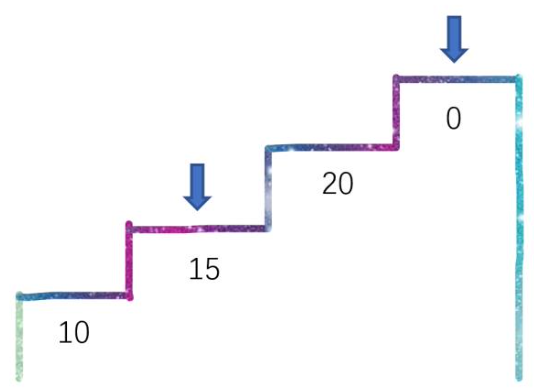

## 动态规划

1. 状态定义: dp[i]表示到达第i级台阶最小花费

2. 初始化: dp[0] = cost[0]; dp[1]=cost[1]

3. 转移方程: dp[i] = min(dp[i-1], dp[i-2]) + cost[i] (i >= 2)

可直接在 cost 列表空间上 DP

转移方程改为: cost[i] += min(cost[i-1], cost[i-2]) (i >= 2)

也為 O(n) time, O(1) space

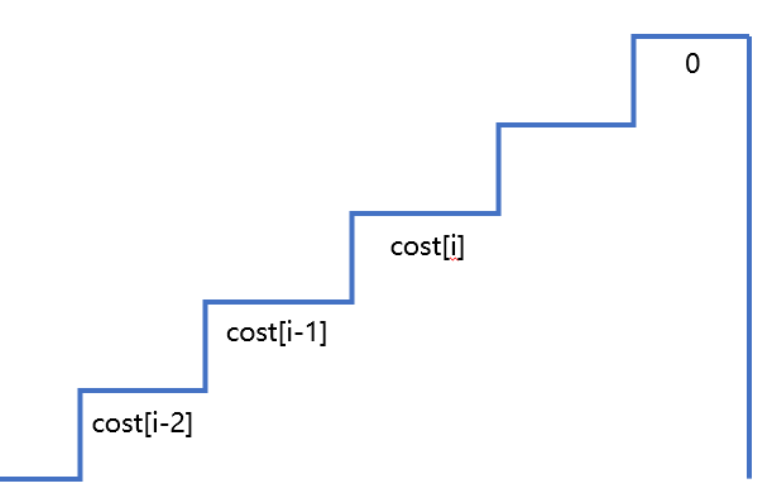

# 26. Manacher

Manacher 算法的能得到一个回文半径的数组 mp。
做法:

- 1. b `#` a `#` n `#` a `#` n `#` a `#` s (更容易找到回文中心，避免了奇偶的问题)

- 2. 维护好已知最长回文的中心和半径

- 3. 从左到右计算，如果当前字符位于最长回文的半径内，那么可以得到一 个很好的“初始化”(初始值): min(mp[2 * id - i], mx - i)

- 4. 从这个初始化开始，向两边延伸，找到当前字符的最长回文半径

## Reference

1. https://medium.com/hoskiss-stand/manacher-299cf75db97e

2. https://dino4cat.blogspot.com/2019/06/manacher.html

# 27. LeetCode 120. Triangle, 三角形最小路径和

Given a triangle array, return the minimum path sum from top to bottom.

For each step, you may move to an adjacent number of the row below. More formally, if you are on index i on the current row, you may move to either index i or index i + 1 on the next row.

给定一个三角形 triangle ，找出自顶向下的最小路径和。

每一步只能移动到下一行中相邻的结点上。相邻的结点 在这里指的是 下标 与 上一层结点下标 相同或者等于 上一层结点下标 + 1 的两个结点。也就是说，如果正位于当前行的下标 i ，那么下一步可以移动到下一行的下标 i 或 i + 1 。


Example 1:

```
Input: triangle = [[2],[3,4],[6,5,7],[4,1,8,3]]
Output: 11
Explanation: The triangle looks like:
   2
  3 4
 6 5 7
4 1 8 3
The minimum path sum from top to bottom is 2 + 3 + 5 + 1 = 11 (underlined above).
```

自顶向下的最小路径和为 11（即，2 + 3 + 5 + 1 = 11）。

Example 2:

```
Input: triangle = [[-10]]
Output: -10
```

Constraints:

- 1 <= triangle.length <= 200

- triangle[0].length == 1

- triangle[i].length == triangle[i - 1].length + 1

- $-10^{4} <= triangle[i][j] <= 10^{4}$

Follow up: Could you do this using only O(n) extra space, where n is the total number of rows in the triangle?

你可以只使用 O(n) 的额外空间（n 为三角形的总行数）来解决这个问题吗？


## 解题思路

- 求出从三角形顶端到底端的最小和。要求最好用 O(n) 的时间复杂度。

- 这一题最优解是不用辅助空间，直接从下层往上层推。普通解法是用二维数组 DP，稍微优化的解法是一维数组 DP。

In [28]:
from typing import List
class Solution:
    def minimumTotal(self, triangle: List[List[int]]) -> int:
        depth = len(triangle)
        for i in range(-2, -depth-1, -1):
            for j in range(depth + 1 + i):
                triangle[i][j] += min(triangle[i+1][j], triangle[i+1][j+1])
        return triangle[0][0]

## 定义状态函数:

dp[i][j] 表示( i,j) 位置的点到最低端的最小路径值。

## 状态转移方程:

dp[i][j] = min {dp[i + 1][j], dp[i + 1][j + 1]} + triangle[i][j]


```{python}
import copy 
class Solution:
    def minimumTotal1(self, triangle):
        if not triangle or triangle == [[]]: return 0
        dp = copy.deepcopy(triangle)
        for items in range(len(dp) - 2, -1, -1):
            for idx in range(len(dp[items])):
                dp[items][idx] = min(dp[items + 1][idx], dp[items + 1][idx + 1]) + triangle[items][idx]
        # print(dp)
        # return dp[0][0] -> 引入二维列表
        return dp[0][0]
```

In [29]:
import copy 
class Solution:
    def minimumTotal1(self, triangle):
        if not triangle or triangle == [[]]: return 0
        dp = copy.deepcopy(triangle)
        for items in range(len(dp) - 2, -1, -1):
            for idx in range(len(dp[items])):
                dp[items][idx] = min(dp[items + 1][idx], dp[items + 1][idx + 1]) + triangle[items][idx]
        # print(dp)
        return dp[0][0]

## 引入一维列表

res = triangle[-1] -> 引入一维列表

```
def minimumTotal2(self, triangle):
    if not triangle or triangle == [[]]: return 0
    # res = triangle[-1] -> 引入一维列表
    res = triangle[-1]
    for items in range(len(triangle) - 2, -1, -1):
        for idx in range(len(triangle[items])):
            res[idx] = min(res[idx], res[idx+1]) + triangle[items][idx]
    return res[0]
```

In [30]:
def minimumTotal2(self, triangle):
    if not triangle or triangle == [[]]: return 0
    # res = triangle[-1] -> 引入一维列表
    res = triangle[-1]
    for items in range(len(triangle) - 2, -1, -1):
        for idx in range(len(triangle[items])):
            res[idx] = min(res[idx], res[idx+1]) + triangle[items][idx]
    return res[0]

## 无需引入其他变量

return triangle[0][0] -> 无需引入其他变量

```
def minimumTotal3(self, triangle):
    if not triangle or triangle == [[]]: return 0
    for items in range(len(triangle) - 2, -1, -1): 
        for idx in range(len(triangle[items])):
            triangle[items][idx] = min(triangle[items + 1][idx], triangle[items + 1][idx + 1]) + triangle[items][idx] 
    # return triangle[0][0] -> 无需引入其他变量
    return triangle[0][0]
```

In [31]:
def minimumTotal3(self, triangle):
    if not triangle or triangle == [[]]: return 0
    for items in range(len(triangle) - 2, -1, -1): 
        for idx in range(len(triangle[items])):
            triangle[items][idx] = min(triangle[items + 1][idx], triangle[items + 1][idx + 1]) + triangle[items][idx] 
    #  return triangle[0][0] -> 无需引入其他变量
    return triangle[0][0]

# 28. 矩阵相乘加括号

## 描述:

设 $A_1, A_2, ... , A_n$ 为矩阵序列，$A_i$ 为 $P_{i-1} \times P_{i}$ 阶矩阵，$i = 1,2,...,n$.

确定 乘法顺序使得元素相乘的总次数最少.

## 输入:

向量 $P = <P_0, P_1, ... , P_n>$，n 个矩阵的行数、列数 实例:

$$P = <10, 100, 5, 50>$$

$$A_1: 10 \times 100, A_2: 100 \times 5, A_3: 5 \times 50$$

## 括号位置不同，相乘总次数不同:

$$
(A_{1}A_{2})A_{3}: 10 \times 100 \times 5 + 10 \times 5 \times 50 = 7500 
A_{1}(A_{2}A_{3}): 10 \times 100 \times 50 + 100 \times 5 \times 50 = 75000
$$

## 枚举算法:

加n个括号的方法有 $\frac{1}{n+1}\left(\begin{array}{c}2 n \\ n\end{array}\right)$ 是一个Catalan数，是指数级别:

搜索空间规模

$$
\begin{aligned}
W(n) &=\Omega\left(\frac{1}{n+1} \frac{(2 n) !}{n ! n !}\right)=\Omega\left(\frac{1}{n+1} \frac{\sqrt{2 \pi 2 n}\left(\frac{2 n}{e}\right)^{2 n}}{\sqrt{2 \pi n}\left(\frac{n}{e}\right)^{n \sqrt{2 \pi n}\left(\frac{n}{e}\right)^{n}}}\right) \\
&=\Omega\left(\frac{1}{n+1} \frac{n^{\frac{1}{2}} 2^{2 n} n^{2 n} e^{n} e^{n}}{e^{2 n} n^{\frac{1}{2}} n^{n} n^{\frac{1}{2}} n^{n}}\right)=\Omega\left(2^{2 n} / n^{\frac{3}{2}}\right)
\end{aligned}
$$

## 确定子问题的边界:

输入 $P=< P_0, P_1, ..., P_n> , A_{i..j}$ 表示乘积 $A_{i}A_{i+1}...A{j}$ 的结果，其最后一次相乘是 $A_{i..j} = A_{i..k} A_{k+1..j}$

## 确定优化函数和递推方程:

$m[i,j]$ 表示得到 $A_{i..j}$ 的最少的相乘次数，则递推方程和初值.

$$
m[i, j]= \begin{cases}0 & i=j \\ \min _{i \leq k<j}\left\{m[i, k]+m[k+1, j]+P_{i-1} P_{k} P_{j}\right\} & i<j\end{cases}
$$


In [32]:
class Matrix:
    def __init__(self, row_num=0, col_num=0, matrix=None):
        if matrix != None:
            self.row_num = len(matrix)
            self.col_num = len(matrix[0])
        else:
            self.row_num = row_num
            self.col_num = col_num
        self.matrix = matrix

In [33]:
def matrix_chain(matrixs):
    matrix_num = len(matrixs)
    m = [[0 for j in range(matrix_num)] for i in range(matrix_num)]
    for interval in range(1, matrix_num + 1): 
        for i in range(matrix_num - interval):
            j = i + interval
            m[i][j] = m[i][i] + m[i + 1][j] + matrixs[i].row_num * matrixs[i + 1].row_num * matrixs[j].col_num
            for k in range(i + 1, j):
                temp = m[i][k] + m[k + 1][j] + matrixs[i].row_num * matrixs[k + 1].row_num * matrixs[j].col_num
                if temp < m[i][j]:
                    m[i][j] = temp 
    return m[0][matrix_num - 1]

# Test
matrixs = [Matrix(30, 35), Matrix(35, 15), Matrix(15, 5), Matrix(5, 10), Matrix(10, 20)]
# print(matrixs)
result = matrix_chain(matrixs)
print(result)

11875


输入 $P= <30, 35, 15, 5, 10, 20>, n=5$，矩阵链:$A_{1}A_{2}A_{3}A_{4}A{5}$，其中 $A_{1}$: $30 \times 35$，$A_{2}$: $35 \times 15$，$A_{3}$: $15 \times 5$，$A_{4}$: $5 \times 10$，$A_{5}$: $10 \times 20$

## 备忘录:

| r | m[1,n] | m[2,n] | m[3,n] | m[4,n] | m[5,n] |
| - | - | - | - | - | - |
| r=1 | m[1,1]=0 | m[2,2]=0 | m[3,3]=0 | m[4,4]=0 | m[5,5]=0 |
| r=2 | m[1,2]=15750 | m[2,3]=2625 | m[3,4]=750 | m[4,5]=1000 |  |
| r=3 | m[1,3]=7875 | m[2,4]=4375 | m[3,5]=2500 |   |   |
| r=4 | m[1,4]=9375 | m[2,5]=7125 |   |   |   |
| r=5 | m[1,5]=11875 |   |   |   |   |

## 解: 

$$(A_{1} (A_{2} A_{3})) (A_{4}A_{5})$$

# 29. LeetCode 123. Best Time to Buy and Sell Stock III 买卖股票的最佳时机 III

You are given an array prices where prices[i] is the price of a given stock on the ith day.

Find the maximum profit you can achieve. You may complete at most two transactions.

Note: You may not engage in multiple transactions simultaneously (i.e., you must sell the stock before you buy again).

给定一个数组，它的第 i 个元素是一支给定的股票在第 i 天的价格。

设计一个算法来计算你所能获取的最大利润。你最多可以完成 两笔 交易。

注意：你不能同时参与多笔交易（你必须在再次购买前出售掉之前的股票）。


Example 1:

```
Input: prices = [3,3,5,0,0,3,1,4]
Output: 6
Explanation: Buy on day 4 (price = 0) and sell on day 6 (price = 3), profit = 3-0 = 3.
Then buy on day 7 (price = 1) and sell on day 8 (price = 4), profit = 4-1 = 3.
```

解释：在第 4 天（股票价格 = 0）的时候买入，在第 6 天（股票价格 = 3）的时候卖出，这笔交易所能获得利润 = 3-0 = 3 。
     随后，在第 7 天（股票价格 = 1）的时候买入，在第 8 天 （股票价格 = 4）的时候卖出，这笔交易所能获得利润 = 4-1 = 3 。


Example 2:

```
Input: prices = [1,2,3,4,5]
Output: 4
Explanation: Buy on day 1 (price = 1) and sell on day 5 (price = 5), profit = 5-1 = 4.
Note that you cannot buy on day 1, buy on day 2 and sell them later, as you are engaging multiple transactions at the same time. You must sell before buying again.
```

解释：在第 1 天（股票价格 = 1）的时候买入，在第 5 天 （股票价格 = 5）的时候卖出, 这笔交易所能获得利润 = 5-1 = 4 。   
     注意你不能在第 1 天和第 2 天接连购买股票，之后再将它们卖出。   
     因为这样属于同时参与了多笔交易，你必须在再次购买前出售掉之前的股票。


Example 3:

```
Input: prices = [7,6,4,3,1]
Output: 0
Explanation: In this case, no transaction is done, i.e. max profit = 0.
```

解释：在这个情况下, 没有交易完成, 所以最大利润为 0。

Constraints:

- $1 <= prices.length <= 10^5$
- $0 <= prices[i] <= 10^5$


## 解题思路

- 要求输出最大收益，这一题不止买卖一次，可以买卖多次，买卖不能在同一天内操作。

- 最大收益来源，必然是每次跌了就买入，涨到顶峰的时候就抛出。只要有涨峰就开始计算赚的钱，连续涨可以用两两相减累加来计算，两两相减累加，相当于涨到波峰的最大值减去谷底的值。这一点看通以后，题目非常简单。

## 定义状态:

dp[i][j][k] 

i 天结束时的最高利润 = [天数][是否持有股票][卖出次数] 

i: 0, ..., n

j: 0, 1

k: 0, 1, 2

## Reference

1. https://blog.csdn.net/m0_52043808/article/details/121456025



In [34]:
class Solution:
    def maxProfit(self, prices):
        if prices==[]:
            return 0
        length=len(prices)
        #结束时的最高利润=[天数][是否持有股票][卖出次数] 
        dp=[ [[0,0,0],[0,0,0] ] for i in range(0,length) ]
        #第一天休息
        dp[0][0][0]=0 
        #第一天买入
        dp[0][1][0]=-prices[0]
        # 第一天不可能已经有卖出
        dp[0][0][1] = float('-inf') 
        dp[0][0][2] = float('-inf')
        #第一天不可能已经卖出
        dp[0][1][1]=float('-inf')
        dp[0][1][2]=float('-inf')
        for i in range(1,length):
            #未持股，未卖出过，说明从未进行过买卖
            dp[i][0][0]=0 
            #未持股，卖出过1次，可能是今天卖的，可能是之前卖的
            dp[i][0][1]=max(dp[i-1][1][0]+prices[i],dp[i-1][0][1]) 
            #未持股，卖出过2次，可能是今天卖的，可能是之前卖的
            dp[i][0][2]=max(dp[i-1][1][1]+prices[i],dp[i-1][0][2]) 
            #持股，未卖出过，可能是今天买的，可能是之前买的
            dp[i][1][0]=max(dp[i-1][0][0]-prices[i],dp[i-1][1][0]) 
            #持股，卖出过1次，可能是今天买的，可能是之前买的
            dp[i][1][1]=max(dp[i-1][0][1]-prices[i],dp[i-1][1][1]) 
            #持股，卖出过2次，不可能
            dp[i][1][2]=float('-inf')
        return max(dp[length-1][0][1],dp[length-1][0][2],0)
if __name__ == "__main__":
    list = [3,1,5,2,1,3,1,9] 
    print(Solution().maxProfit(list))

12


# 30. 多起点多终点最短路径问题

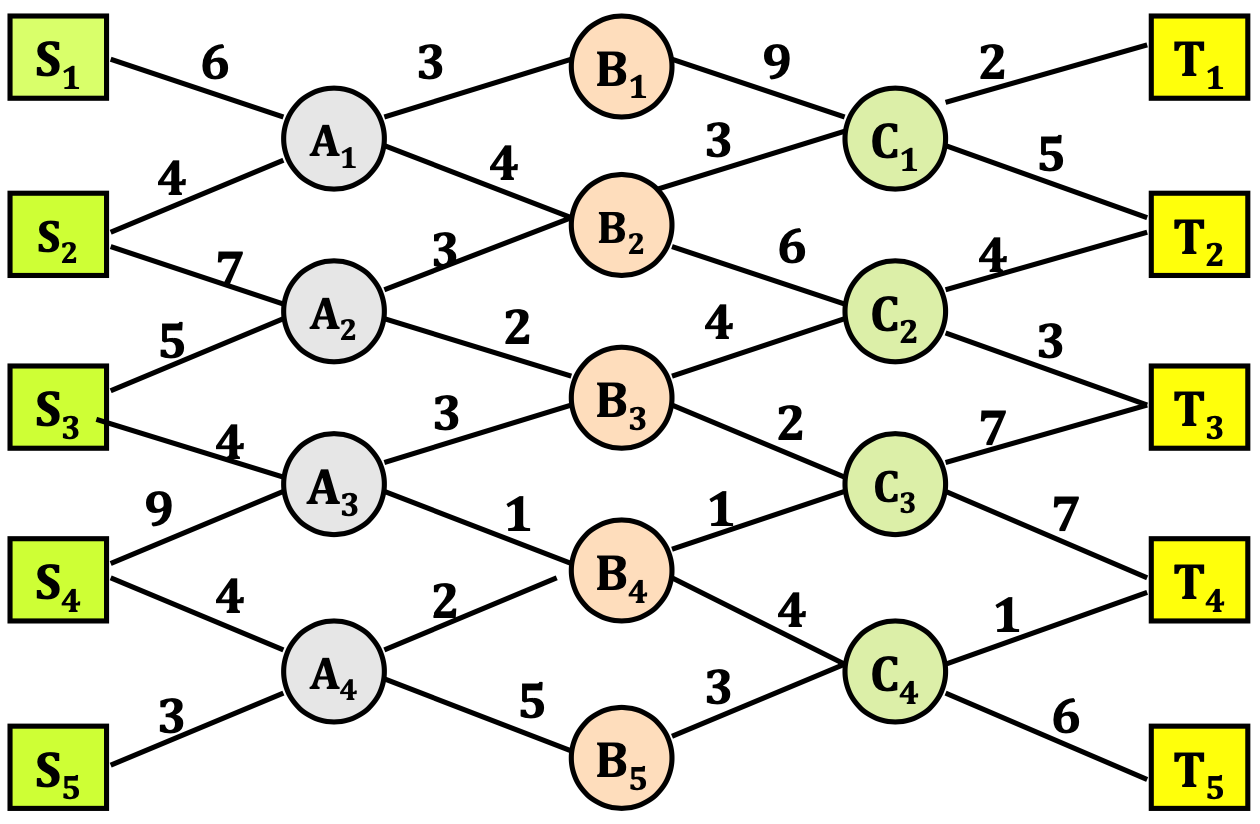

边上的数字代表路径的距离，任意起点 $S_{i}$ 到任意终点 $T_{k}$ 的所有路径最短距离是多少?

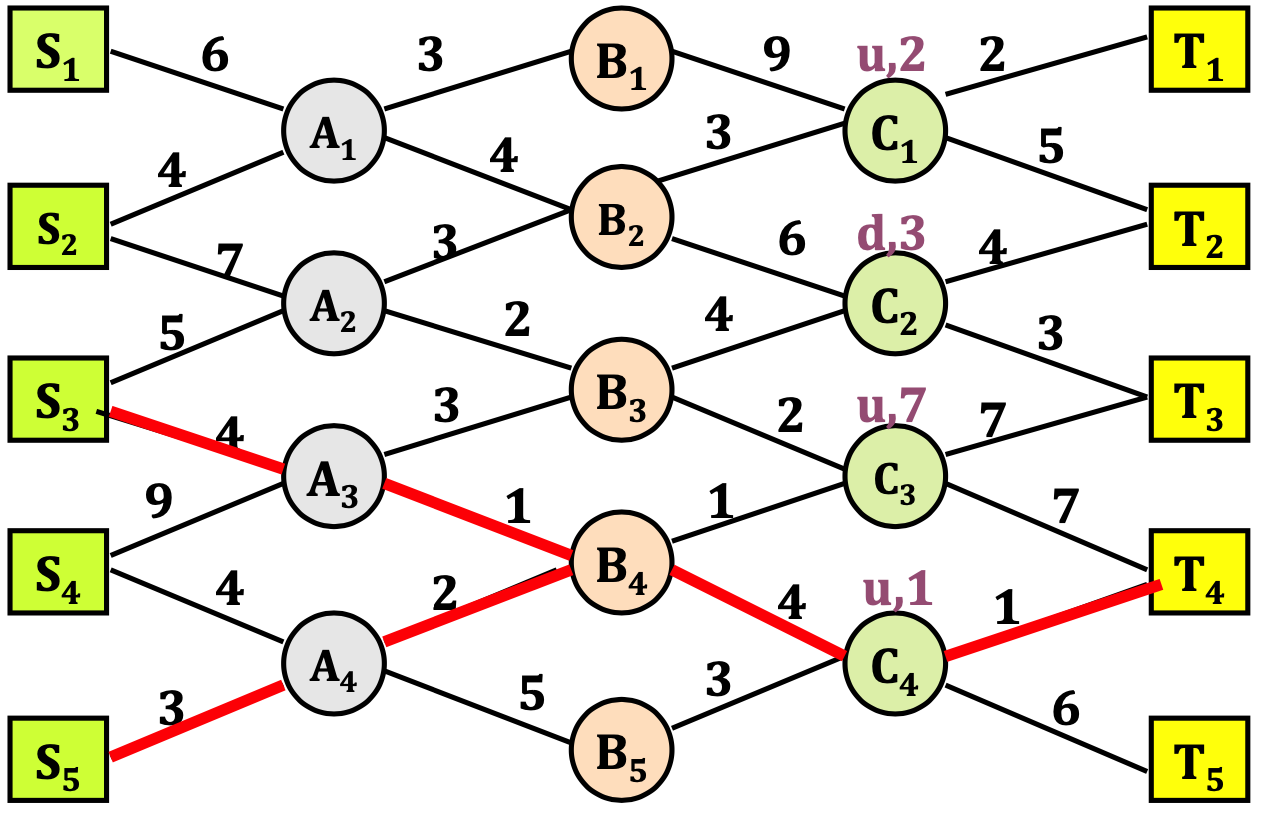

存在两条最短路径，距离都是10。

定义状态: F(V) 表示点到终点最短的距离。

状态转移方程:
    
$$
\begin{aligned}
&F\left(C_{l}\right)=\min _{m}\left\{C_{l} T_{m}\right\} \\
&F\left(B_{k}\right)=\min _{l}\left\{B_{k} C_{l}+F\left(C_{l}\right)\right\} \\
&F\left(A_{j}\right)=\min _{k}\left\{A_{j} B_{k}+F\left(B_{k}\right)\right\} \\
&F\left(S_{i}\right)=\min _{j}\left\{S_{i} A_{j}+F\left(A_{j}\right)\right\}
\end{aligned}
$$

- 优化函数的特点: 任何最短路径的子路径都是相对于子路径始点和终点的最短路径

- 求解步骤: 确定子问题的边界、从最小的子问题开始进行多步判断

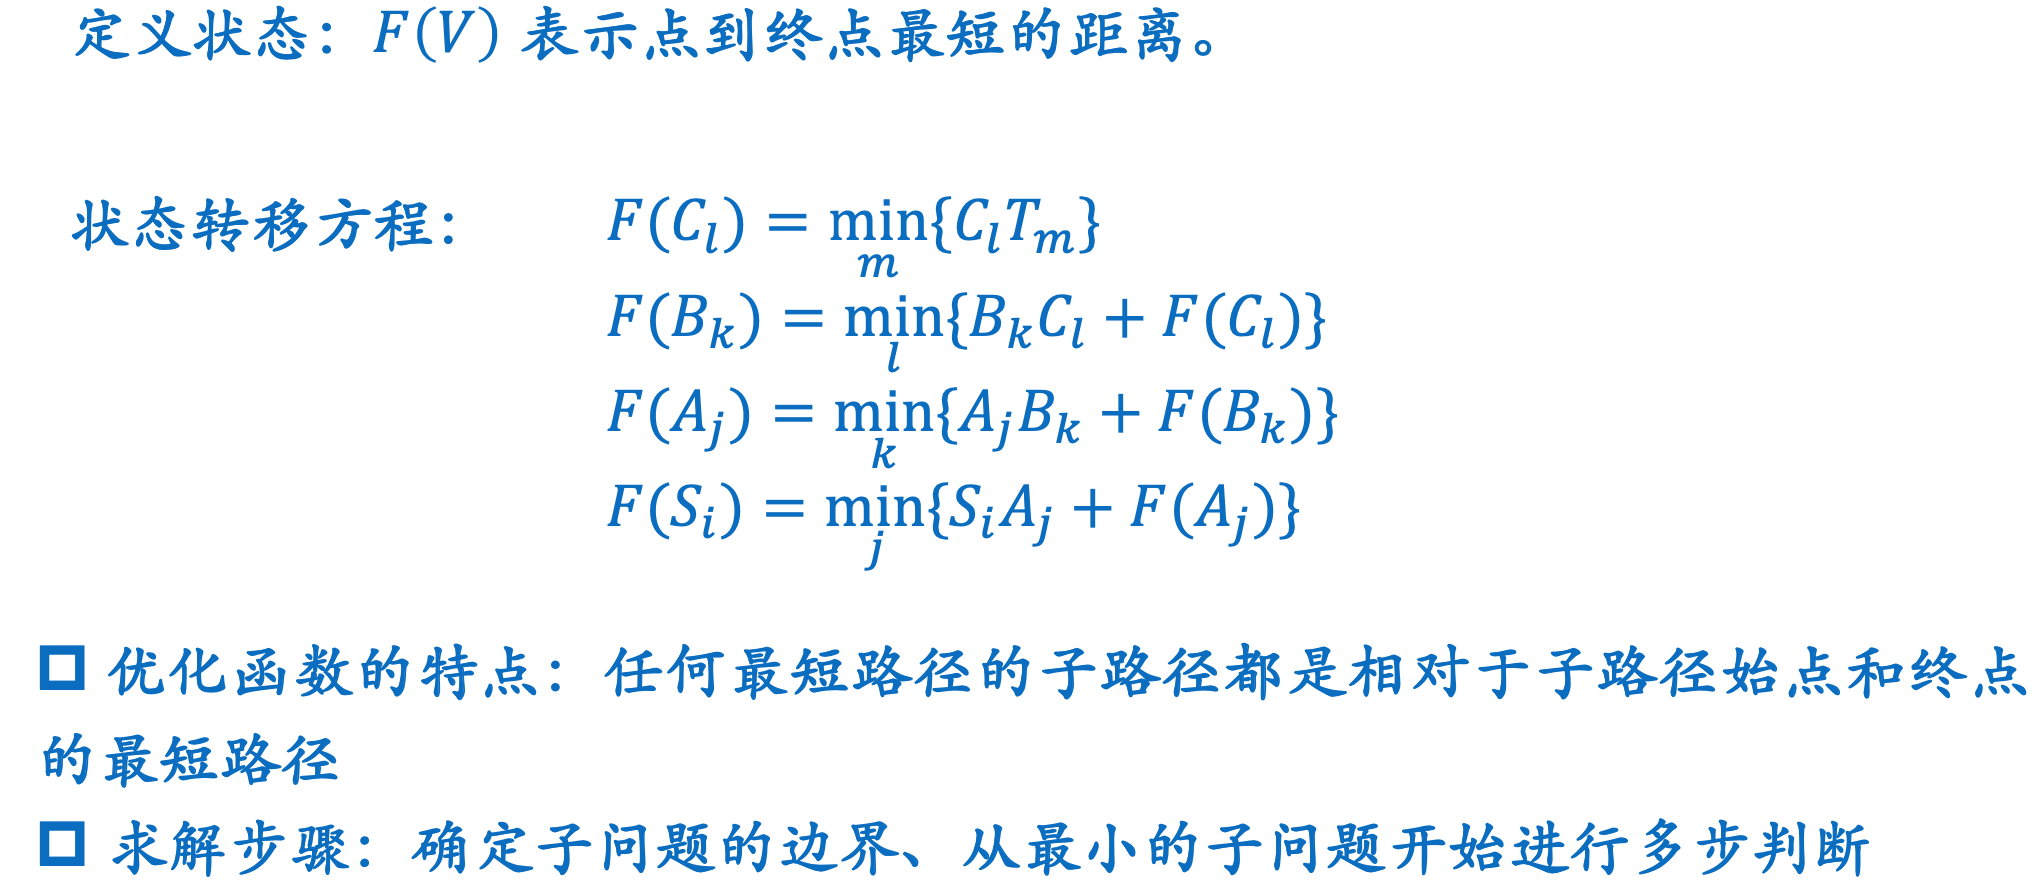

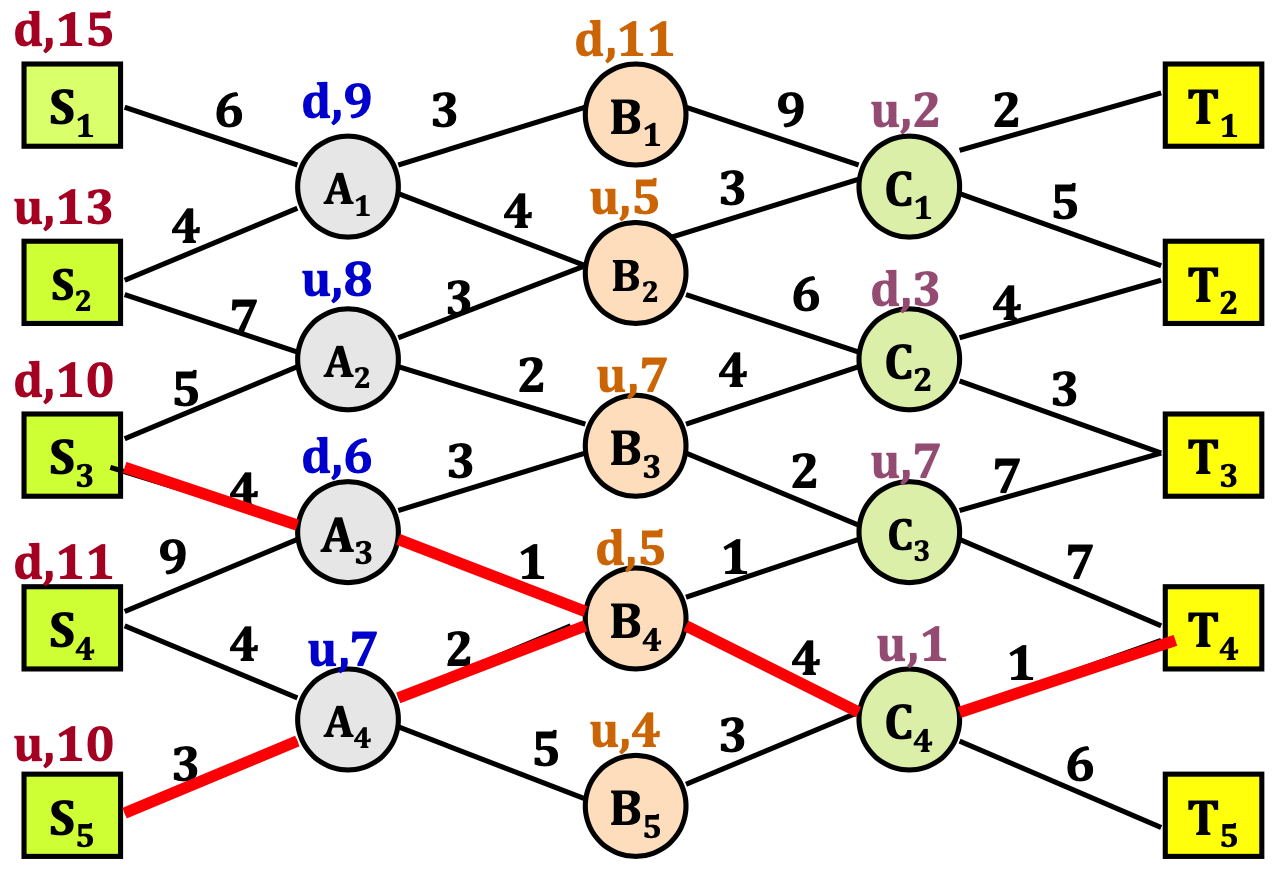
$$
\min _{i}\left\{F\left(\boldsymbol{S}_{\boldsymbol{i}}\right)\right\}=\mathbf{1 0}
$$

# 31. 不满足优化子结构的例子

## 优化原则:

一个最优决策序列的任何子序列本身一定是相对于子序列的初始和结束状态的最优的决策序列。

例 : 求总长模 10 的最小路径

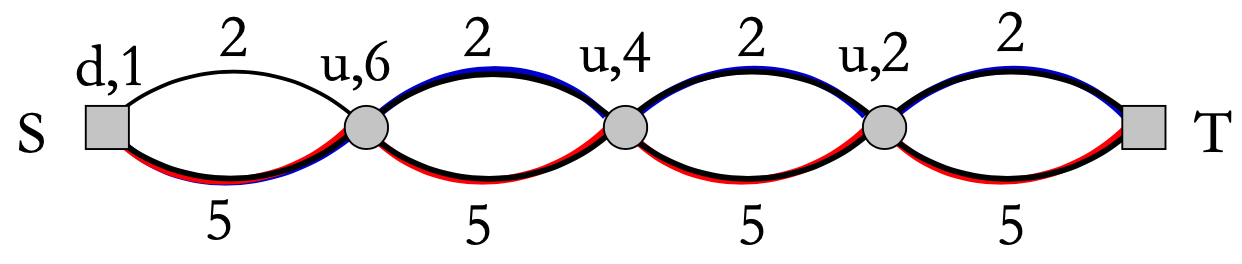

## 最优解: 下、下、下、下

## 动态规划算法的解: 下、上、上、上

## 不满足优化原则，不能使用动态规划设计技术



# 32. LeetCode 300. Longest Increasing Subsequence 最长递增子序列

Given an integer array nums, return the length of the longest strictly increasing subsequence.

A subsequence is a sequence that can be derived from an array by deleting some or no elements without changing the order of the remaining elements. For example, [3,6,2,7] is a subsequence of the array [0,3,1,6,2,2,7].


给你一个整数数组 nums ，找到其中最长严格递增子序列的长度。

子序列 是由数组派生而来的序列，删除（或不删除）数组中的元素而不改变其余元素的顺序。例如，[3,6,2,7] 是数组 [0,3,1,6,2,2,7] 的子序列。


Example 1:

```
Input: nums = [10,9,2,5,3,7,101,18]
Output: 4
Explanation: The longest increasing subsequence is [2,3,7,101], therefore the length is 4.

```

最长递增子序列是 [2,3,7,101]，因此长度为 4 。

Example 2:

```
Input: nums = [0,1,0,3,2,3]
Output: 4
```


Example 3:

```
Input: nums = [7,7,7,7,7,7,7]
Output: 1
```


Constraints:

- $1 <= nums.length <= 2500$

- $10^4 <= nums[i] <= 10^4$

Follow up: Can you come up with an algorithm that runs in O(n log(n)) time complexity?

你能将算法的时间复杂度降低到 O(n log(n)) 吗?

## Tip

你能将算法的时间复杂度降低到 O(n log(n)) 吗?  ... 利用二叉搜索


## Reference

https://books.halfrost.com/leetcode/ChapterFour/0300~0399/0300.Longest-Increasing-Subsequence/


## 定义状态函数 :

dp[i] 表示包含第 i 个元素的最大上升子序列的长度。

$$
\begin{gathered}
\operatorname{nums}=[10,9,2,5,3,7,101,18] \\
d p=[1,1,1,2,2,3,4,4] \\
\end{gathered}
$$

## 状态转移方程 :

$$
\begin{gathered}
d p[i]=\max _{0 \leq j<i}\{d p[j]+1,1\}, \text { if nums }[i]>\text { nums }[j] \\
\end{gathered}
$$

## 最终结果 :

$$
\begin{gathered}
\max _{i}\{d p[i]\}
\end{gathered}
$$

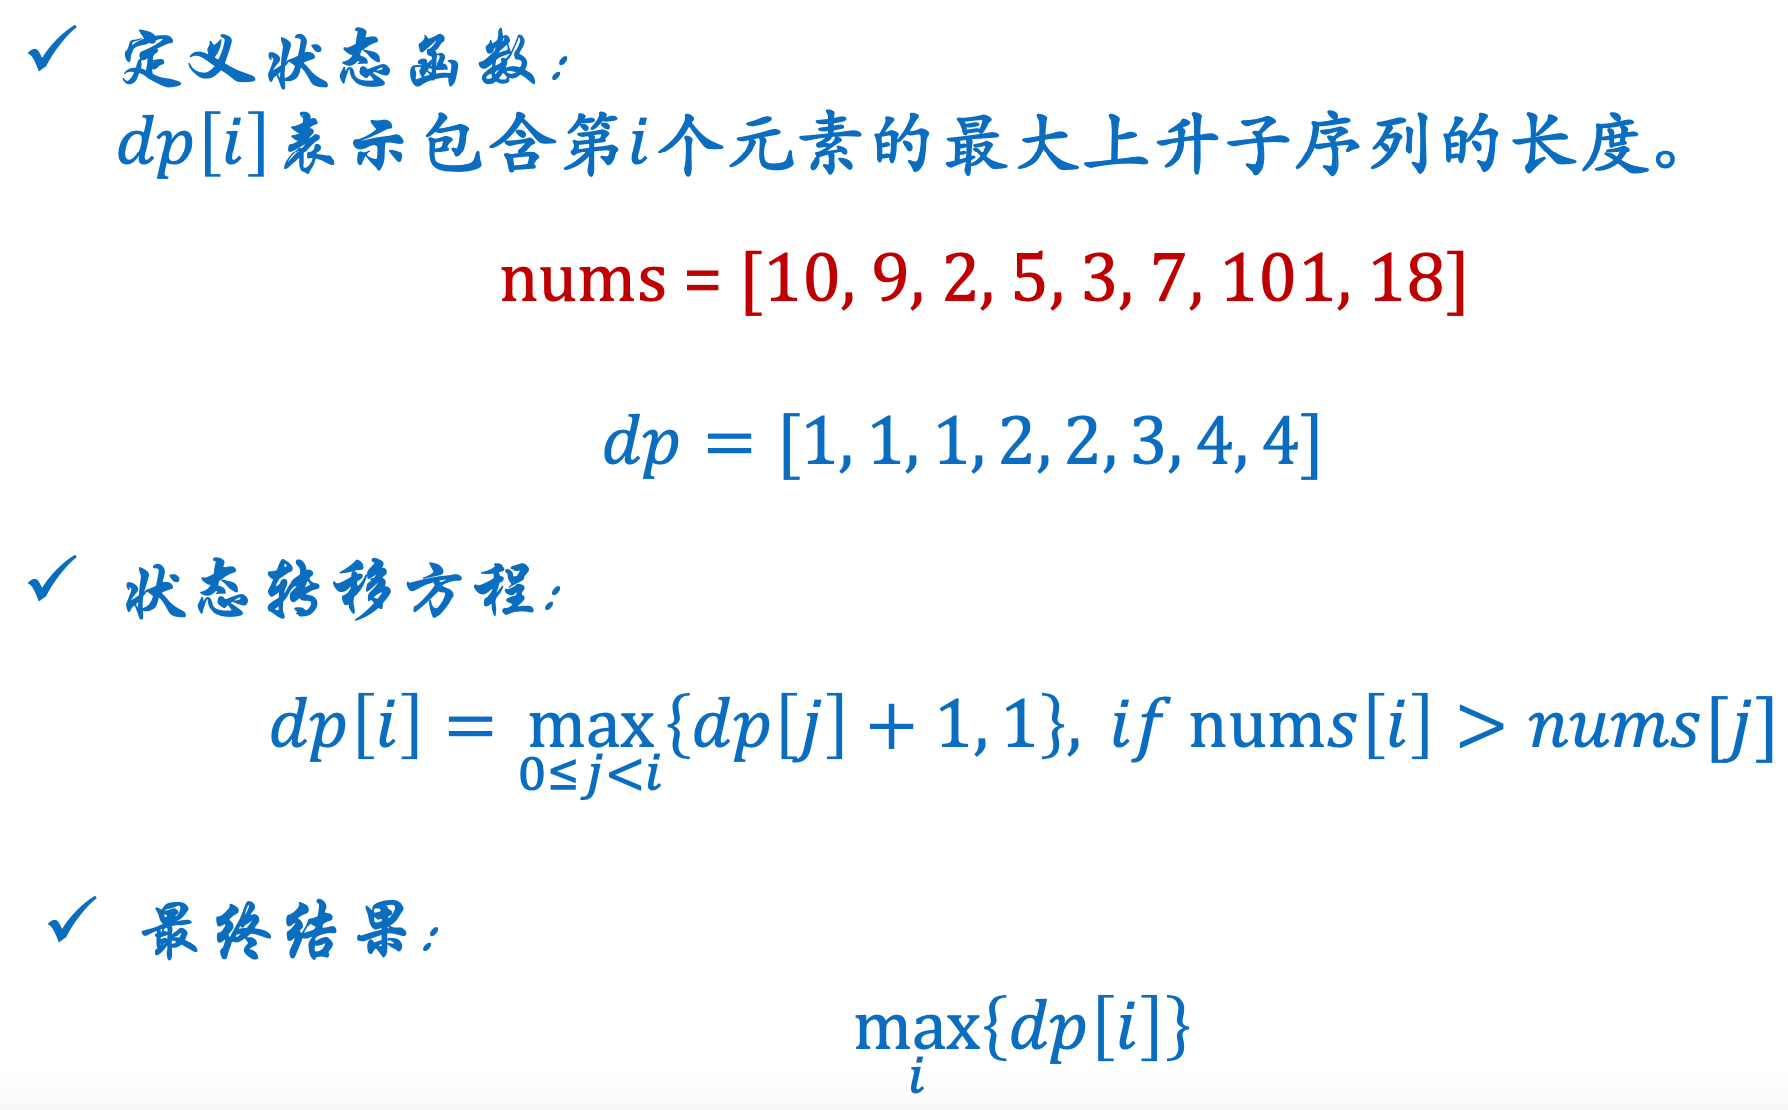

In [35]:
class Solution(object):
    def lengthOfLIS(self, nums):
        if not nums:
            return 0
        N = len(nums)
        dp = [1 for _ in range(N)]
        ans = 1
        for i in range(1, N):
            temp = []
            temp.append(1)
            for j in range(i):
                if nums[i] > nums[j]:
                    temp.append(dp[j] + 1)
            dp[i] = max(temp)
            ans = max(ans, dp[i]) 
        return ans

In [36]:
# Sample 简洁版
class Solution(object):
    def lengthOfLIS(self, nums):
        if not nums:
            return 0
        N = len(nums)
        dp = [1 for _ in range(N)]
        ans = 1
        for i in range(1, N):
            for j in range(i):
                if nums[i] > nums[j]:
                    dp[i] = max(dp[i], dp[j] + 1)
            ans = max(ans, dp[i])
        return ans

# 33. LeetCode 53. Maximum Subarray 最长递增子序列

Given an integer array nums, find the contiguous subarray (containing at least one number) which has the largest sum and return its sum.

A subarray is a contiguous part of an array.

给你一个整数数组 nums ，请你找出一个具有最大和的连续子数组（子数组最少包含一个元素），返回其最大和。

子数组 是数组中的一个连续部分。


Example 1:

```
Input: nums = [-2,1,-3,4,-1,2,1,-5,4]
Output: 6
Explanation: [4,-1,2,1] has the largest sum = 6.
```

解释：连续子数组 [4,-1,2,1] 的和最大，为 6 。


Example 2:

```
Input: nums = [1]
Output: 1
```


Example 3:

```
Input: nums = [5,4,-1,7,8]
Output: 23
```


Constraints:

- $1 <= nums.length <= 10^5$
- $10^4 <= nums[i] <= 10^4$

Follow up: If you have figured out the O(n) solution, try coding another solution using the divide and conquer approach, which is more subtle.

如果你已经实现复杂度为 O(n) 的解法，尝试使用更为精妙的 分治法 求解。

## Reference

https://books.halfrost.com/leetcode/ChapterFour/0001~0099/0053.Maximum-Subarray/


In [37]:
class Solution(object):
    def maxSubArray(self, nums):
        for i in range(1, len(nums)):
            nums[i]= nums[i] + max(nums[i-1], 0)
        return max(nums)

## LC 53 概念說明

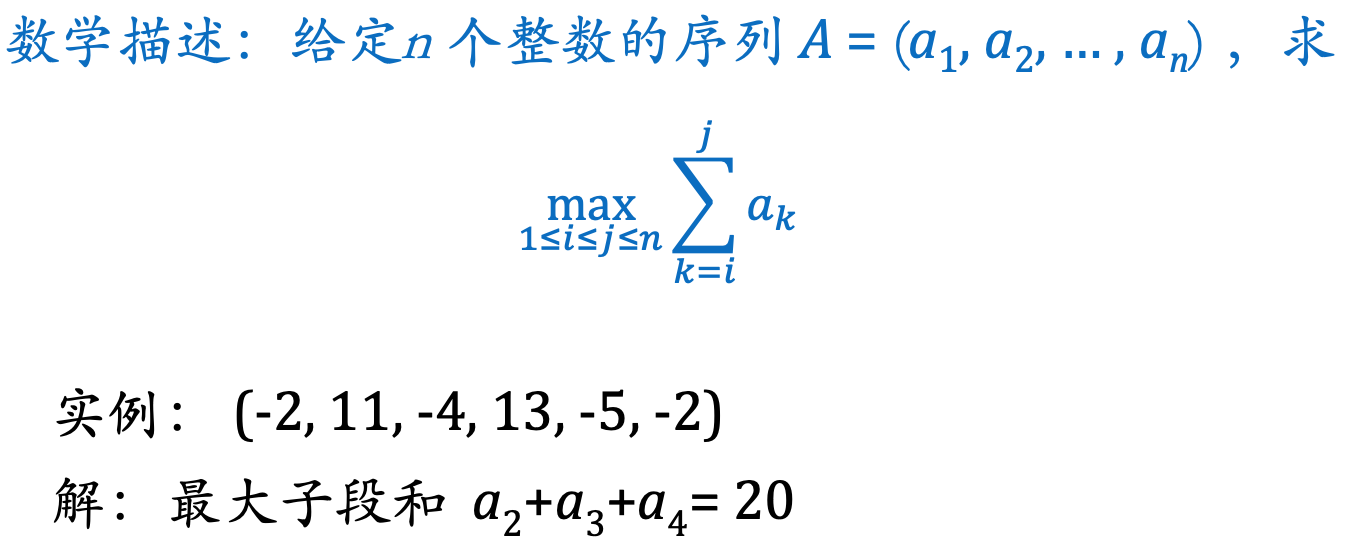

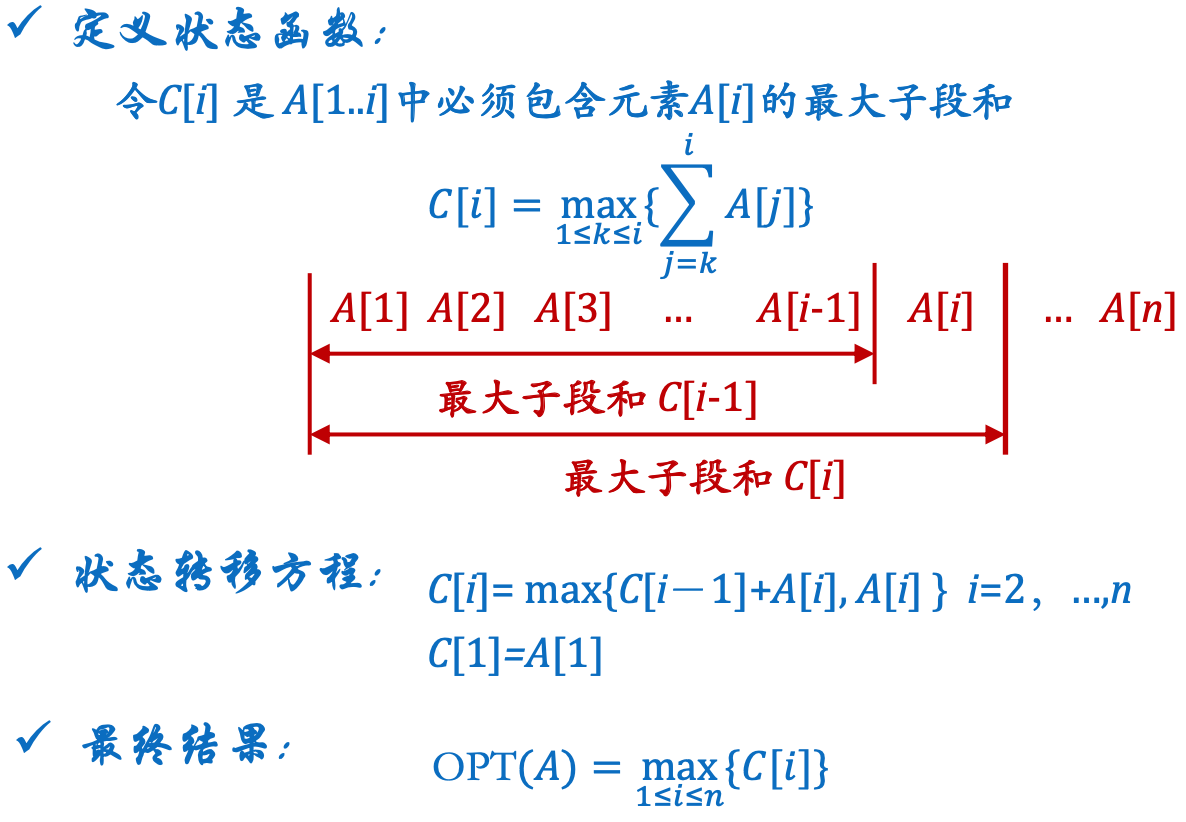

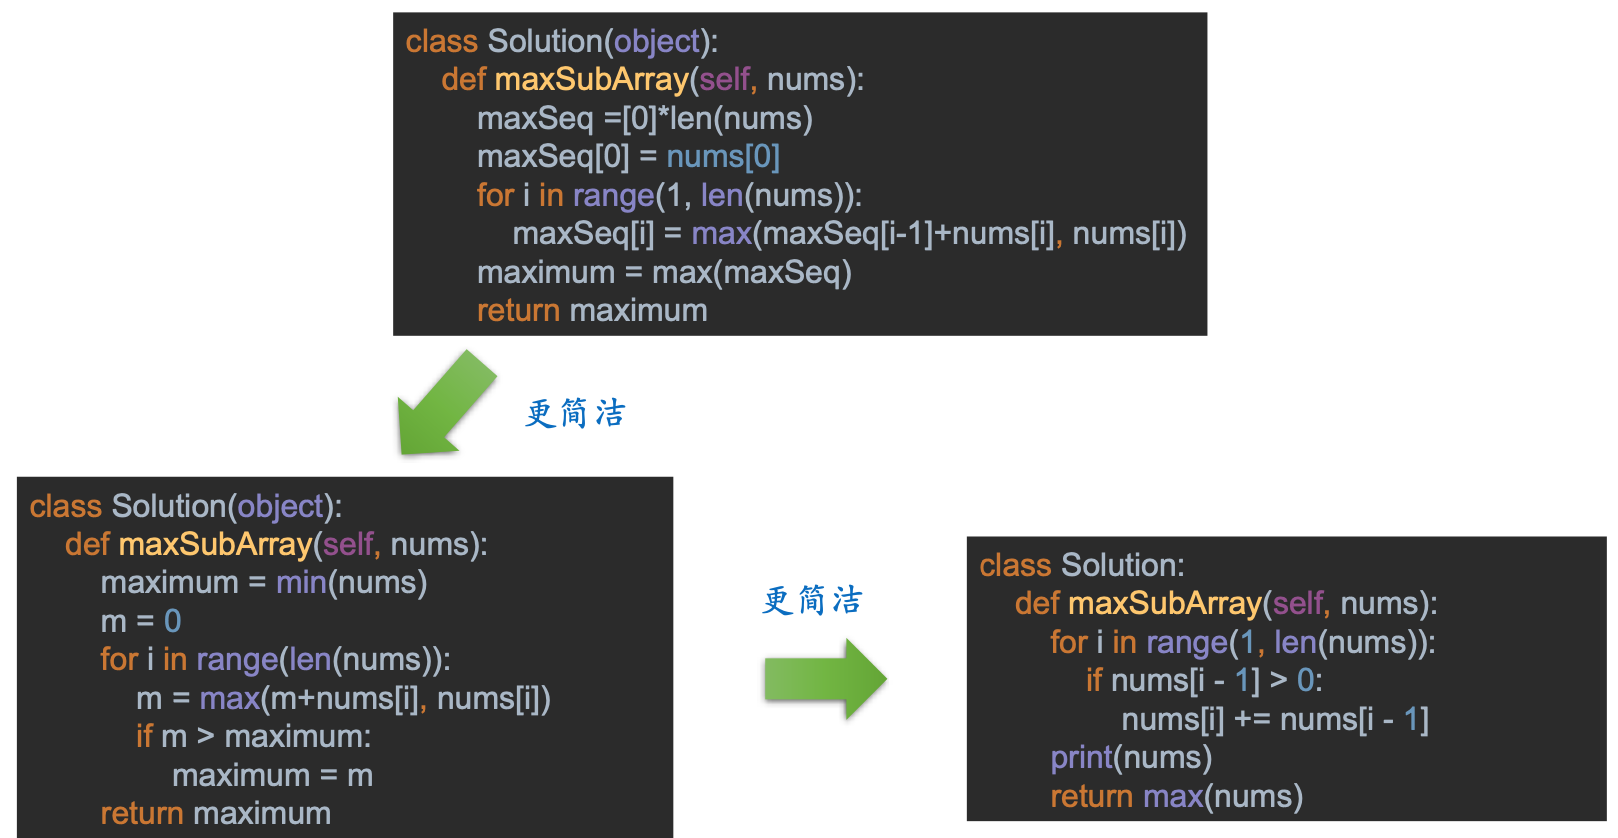

In [38]:
# LC 53  (KP)

class Solution(object):
    def maxSubArray(self, nums):
        maxSeq =[0]*len(nums) 
        maxSeq[0] = nums[0]
        for i in range(1, len(nums)):
            maxSeq[i] = max(maxSeq[i-1]+nums[i], nums[i])
        maximum = max(maxSeq)
        return maximum

# Sample

class Solution(object):
    def maxSubArray(self, nums):
        maximum = min(nums)
        m = 0
        for i in range(len(nums)):
            m = max(m+nums[i], nums[i])
            if m > maximum:
                maximum = m 
        return maximum

# More Sample

class Solution:
    def maxSubArray(self, nums):
        for i in range(1, len(nums)):
            if nums[i - 1] > 0:
                nums[i] += nums[i - 1]
        print(nums)
        return max(nums)

# 34. 最长公共子序列 (Longest Common Subsequence, LCS)

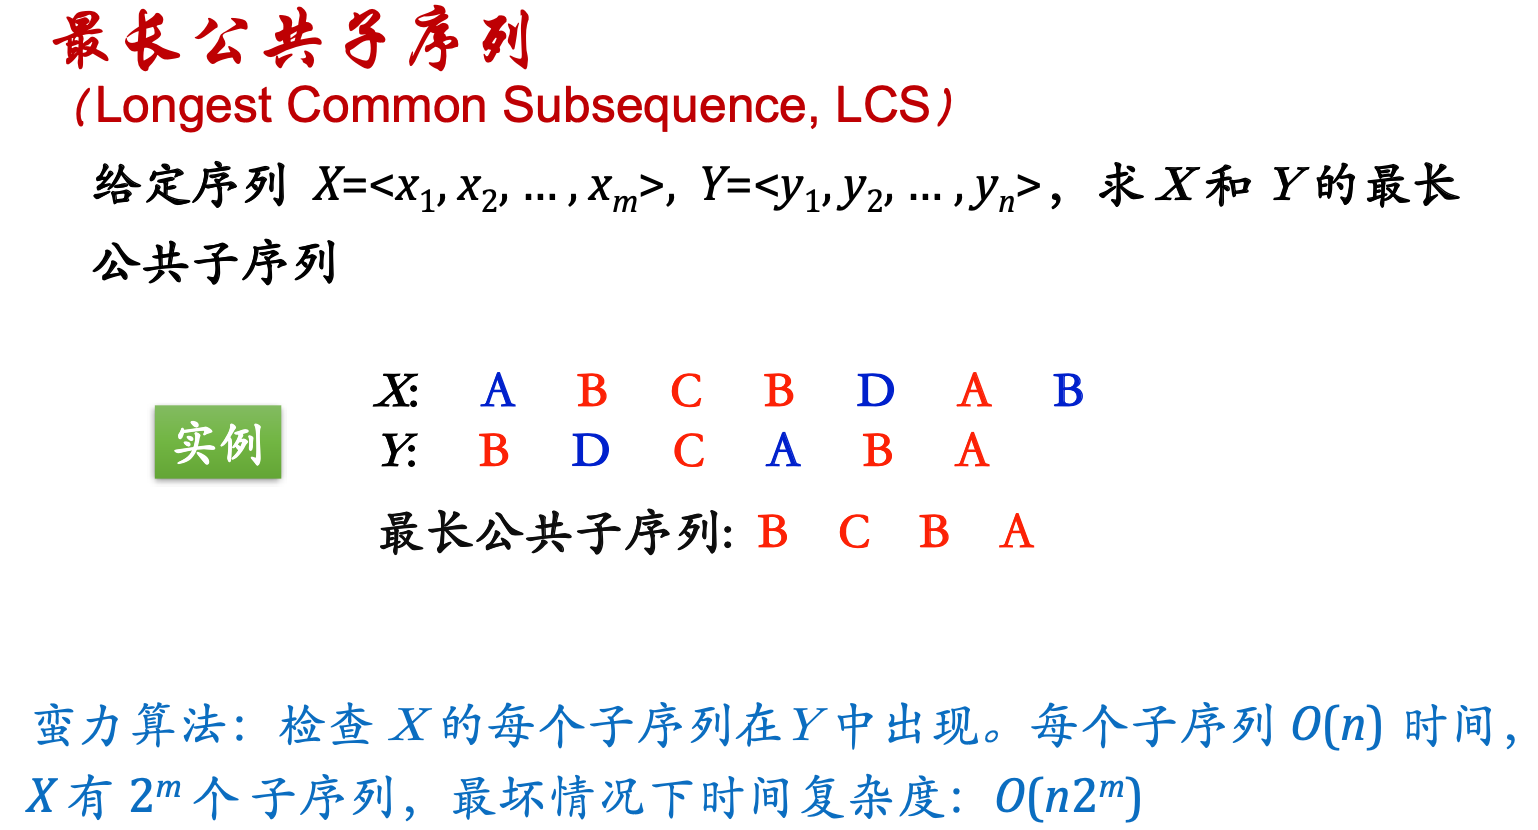

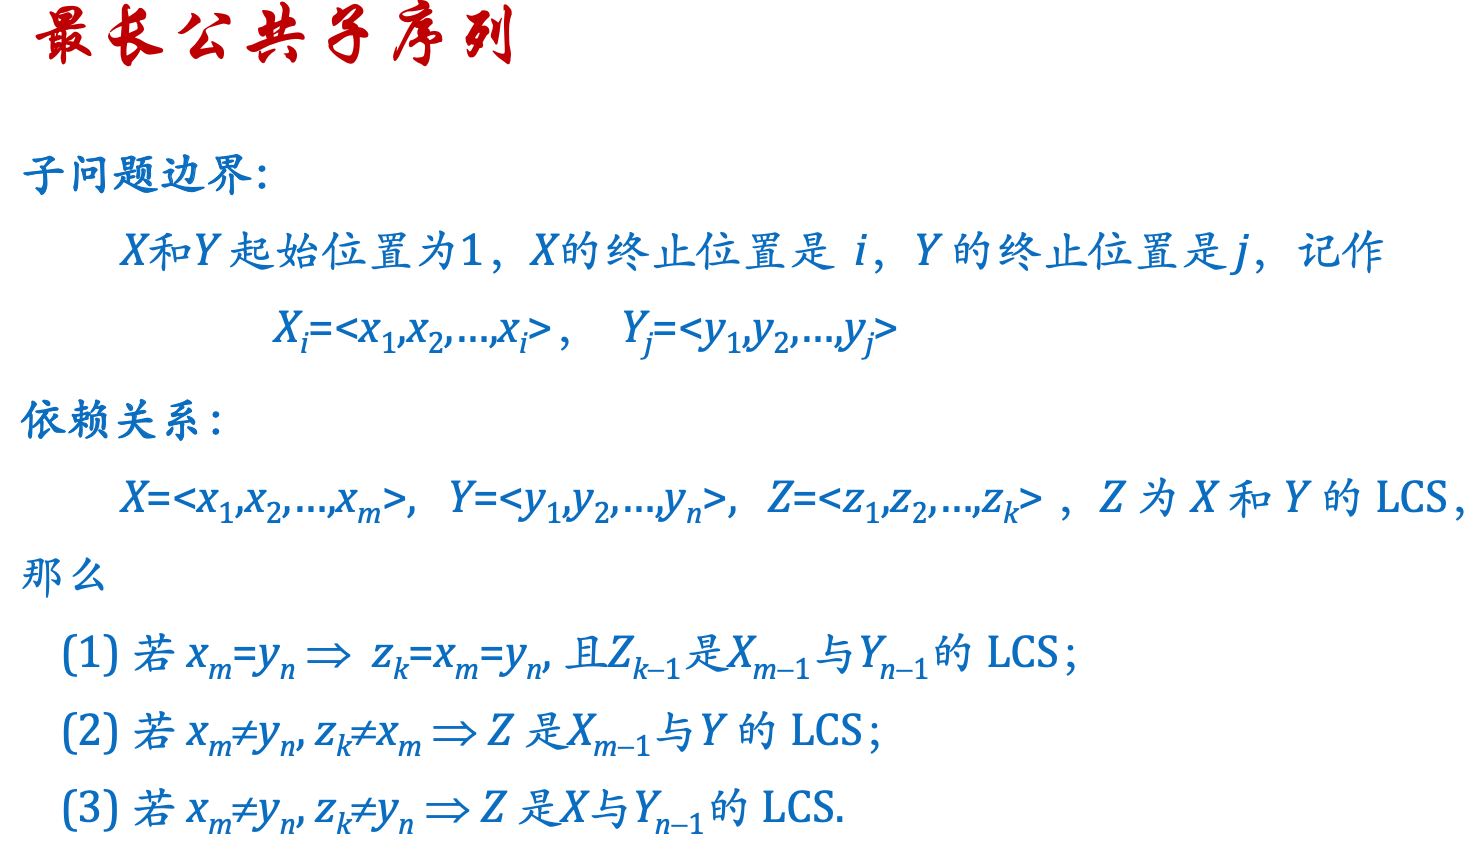

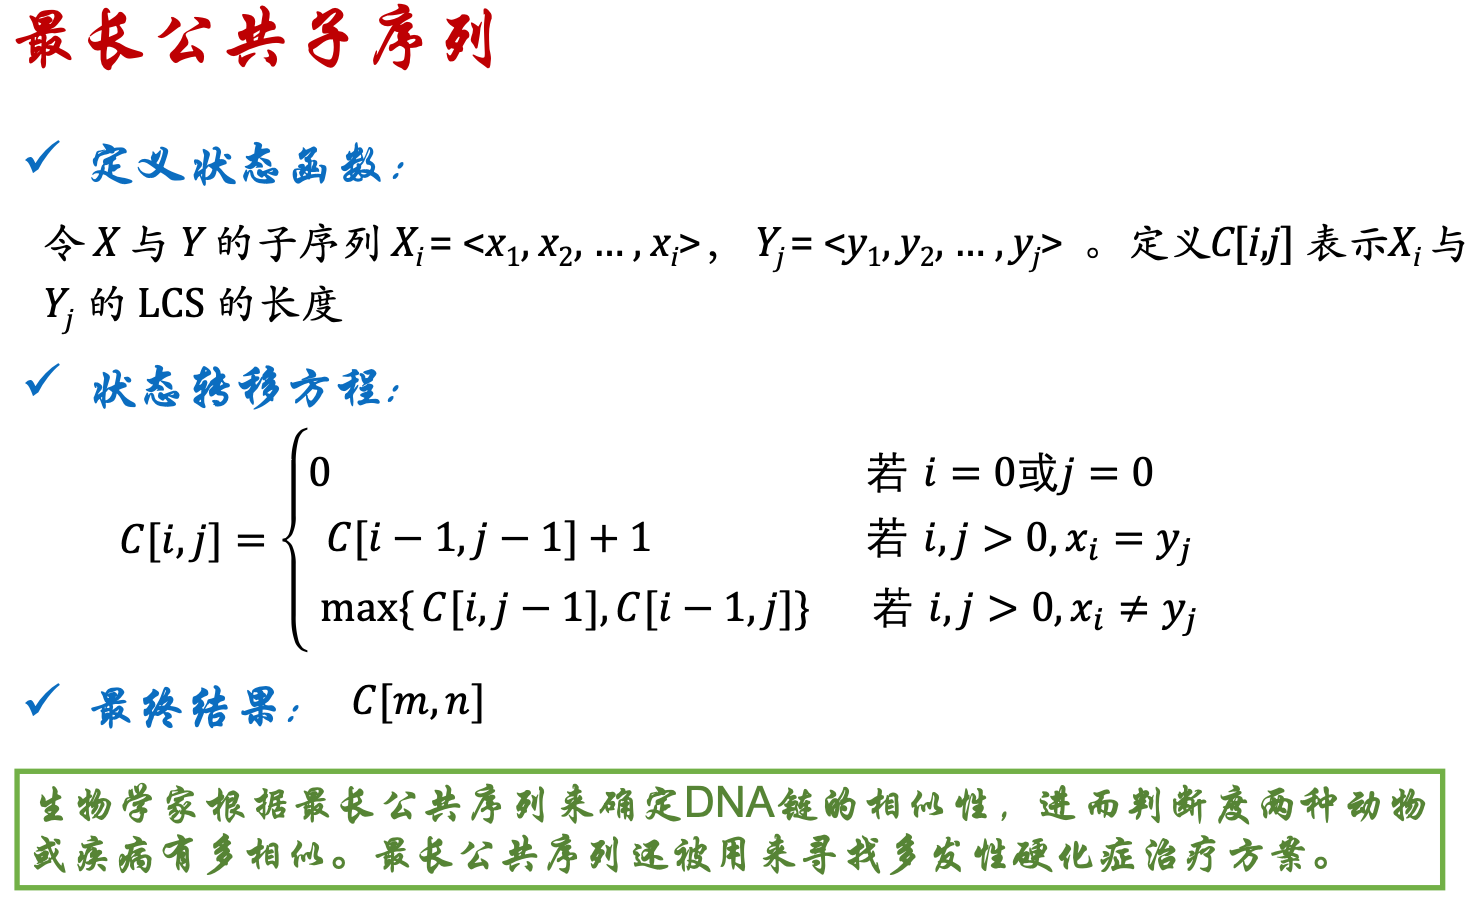

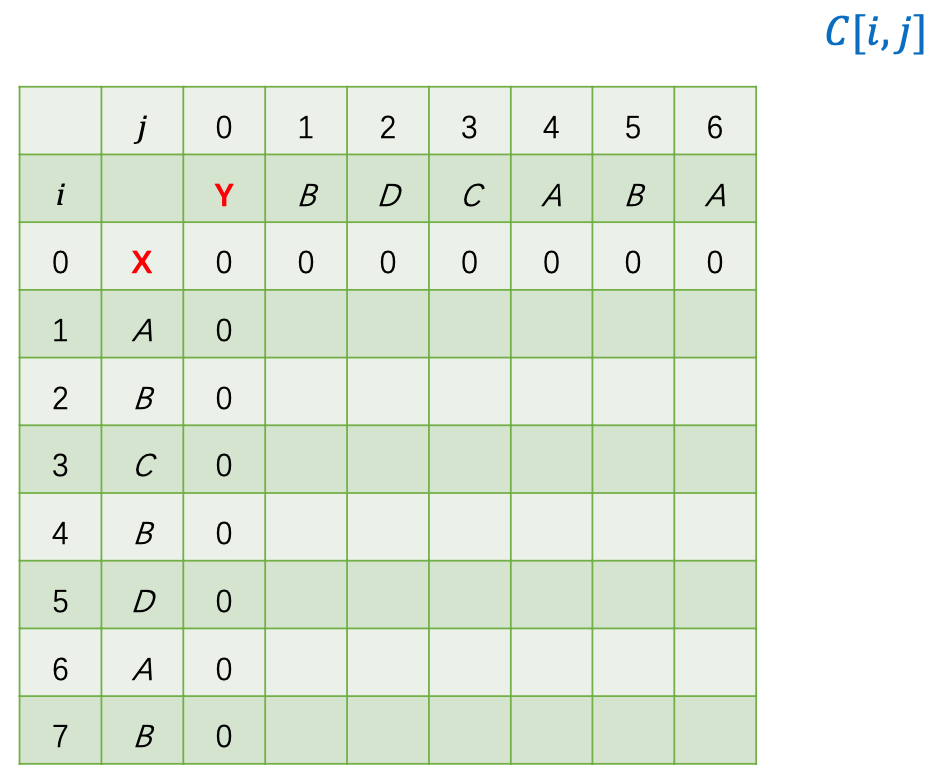

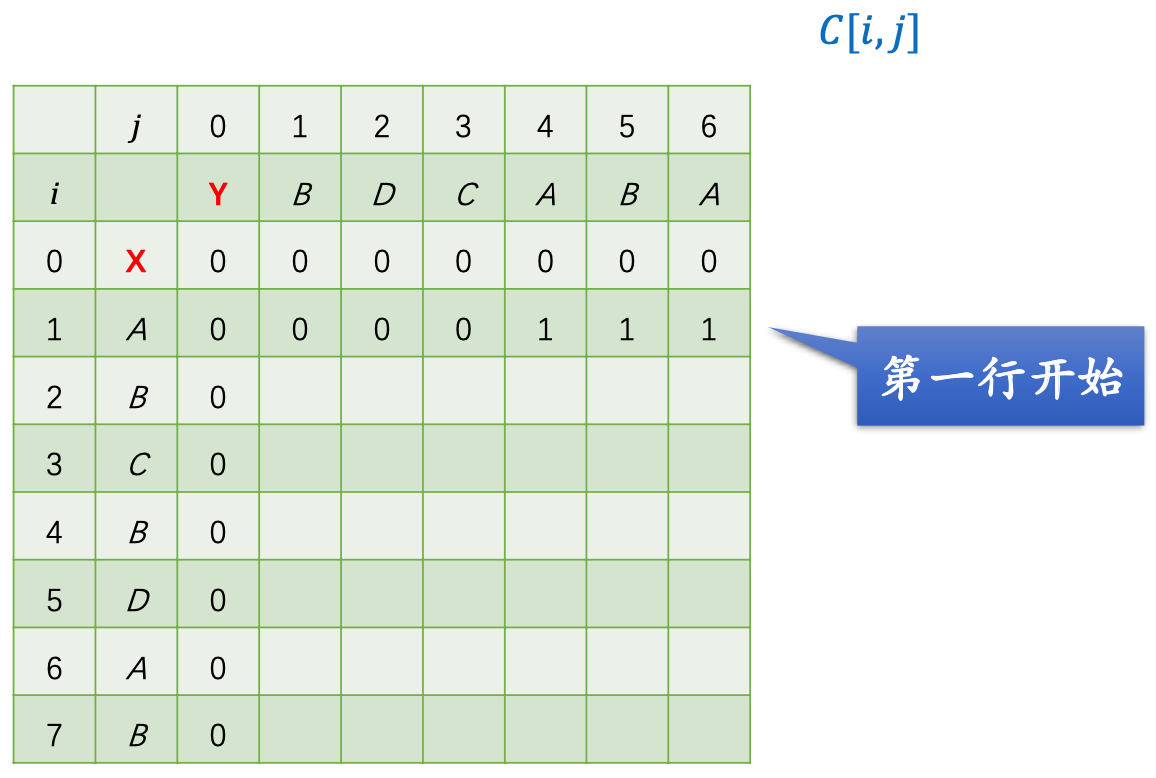

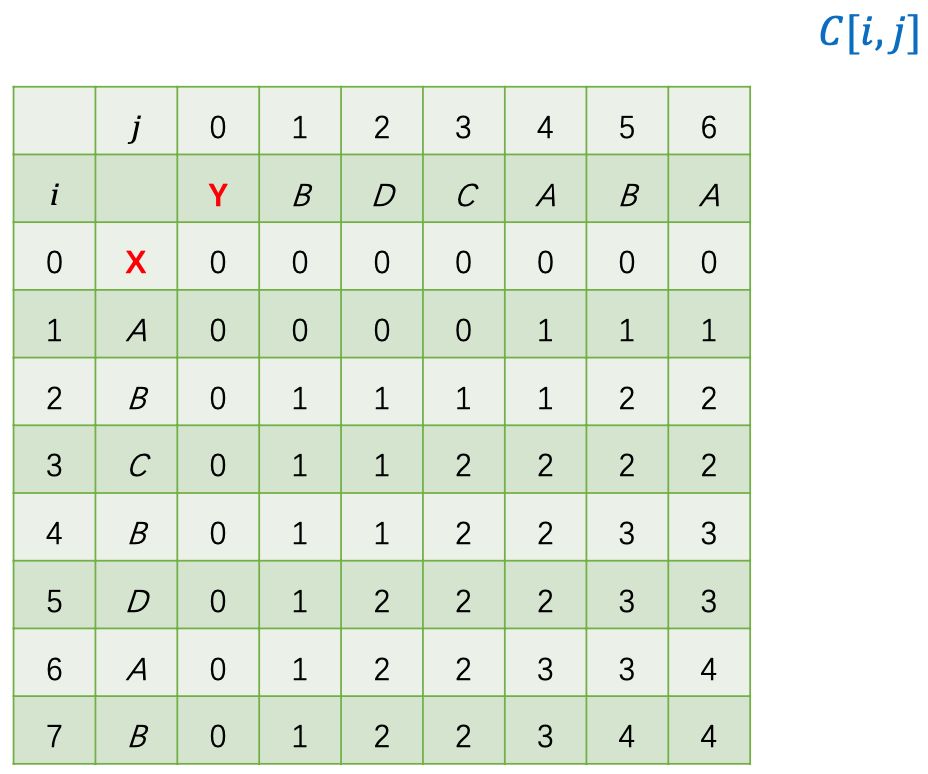